# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Rizal Nur Arbaatun - 1301210044
2. Galih Akbar Nugraha - 1301213060
3. Muhammad Abiya Makruf - 1301213157

## Latar Belakang

Penggunaan model Machine Learning dalam berbagai bidang telah menjadi tren yang signifikan dalam pengembangan teknologi modern. Salah satu aplikasi yang sangat menarik adalah dalam pemodelan kebiasaan siswa menggunakan model Artificial Neural Network (ANN). Penelitian terkait ini didasarkan pada pengolahan data kebiasaan siswa, yang dapat memberikan wawasan penting bagi institusi pendidikan, guru, dan orang tua dalam mengoptimalkan lingkungan belajar siswa, meningkatkan hasil akademik, dan mendukung pertumbuhan holistik siswa.

Kebiasaan siswa adalah faktor kunci yang memengaruhi kinerja akademik mereka. Kebiasaan belajar, rutinitas, dan gaya belajar adalah beberapa aspek utama yang memengaruhi nilai siswa. Dengan mengumpulkan dan menganalisis data tentang kebiasaan siswa, kita dapat mengidentifikasi pola dan korelasi yang dapat membantu memahami faktor-faktor yang memengaruhi nilai mereka.

Pengolahan data kebiasaan siswa dimulai dengan pengumpulan data yang mencakup berbagai variabel, seperti waktu belajar, hubungan keluarga, nilai di sekolah dan banyak faktor lainnya yang relevan. Data kemudian diolah untuk menghilangkan noise atau gangguan yang tidak diinginkan dan disesuaikan agar dapat digunakan dalam analisis. Dalam tahap analisis, metode statistik dan algoritma pembelajaran mesin digunakan untuk mengidentifikasi pola dan korelasi dalam data set.

Setelah data telah dipersiapkan, langkah berikutnya adalah menerapkan model Machine Learning ANN, untuk menganalisis data tersebut. ANN adalah jenis model Machine Learning yang tepat untuk tugas ini karena kemampuannya dalam mengidentifikasi pola kompleks dalam data. Dengan menggunakan model ANN kita dapat memprediksi nilai akhir siswa berdasarkan kebiasaan mereka dan nilai sebelum-sebelumnya.

Penerapan model ANN dalam analisis kebiasaan siswa memiliki manfaat potensial yang besar dalam dunia pendidikan. Ini dapat membantu guru dan institusi pendidikan dalam merancang strategi pembelajaran yang lebih efektif, mengidentifikasi siswa yang mungkin memerlukan bantuan tambahan, dan mengukur dampak dari perubahan dalam kebijakan pendidikan. Selain itu, model ini dapat memberikan wawasan berharga kepada orang tua untuk mendukung anak-anak mereka dalam perjalanan pendidikan mereka.

Dalam rangka mencapai tujuan tersebut, penting untuk melakukan penelitian yang mendalam dalam pengembangan model ANN untuk analisis kebiasaan siswa. Dengan mengintegrasikan teknologi Machine Learning ke dalam pendidikan, kita dapat menciptakan lingkungan belajar yang lebih adaptif dan terpersonalisasi, yang pada akhirnya dapat meningkatkan hasil akademik siswa dan memberikan manfaat yang signifikan dalam sektor pendidikan.

## Eksplorasi data

### Load dataset

#### Import

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import KFold

# Styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

#### Read data

Download dataset

In [184]:
!gdown 172TQNe3kZYs3d6UWqVOXY_UrH5_KwFEf #student-por.csv
!gdown 1_szeC9LZJxyUfdVX9ThmEjgMrkcD3xzd #student-mat.csv

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


Read dataset

In [185]:
df = pd.read_csv('./content/student-por.csv',sep=";")
# df = pd.read_csv('./content/student-mat.csv',sep=";")

### Analisis Data

Menampilkan jumlah kolom dan tipe data masing masing kolom

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Menampilkan lima data awal

In [187]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Deskripsi statistik dari kolom numerik pada dataset

In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


Korelasi antar kolom yang numerik

<Axes: >

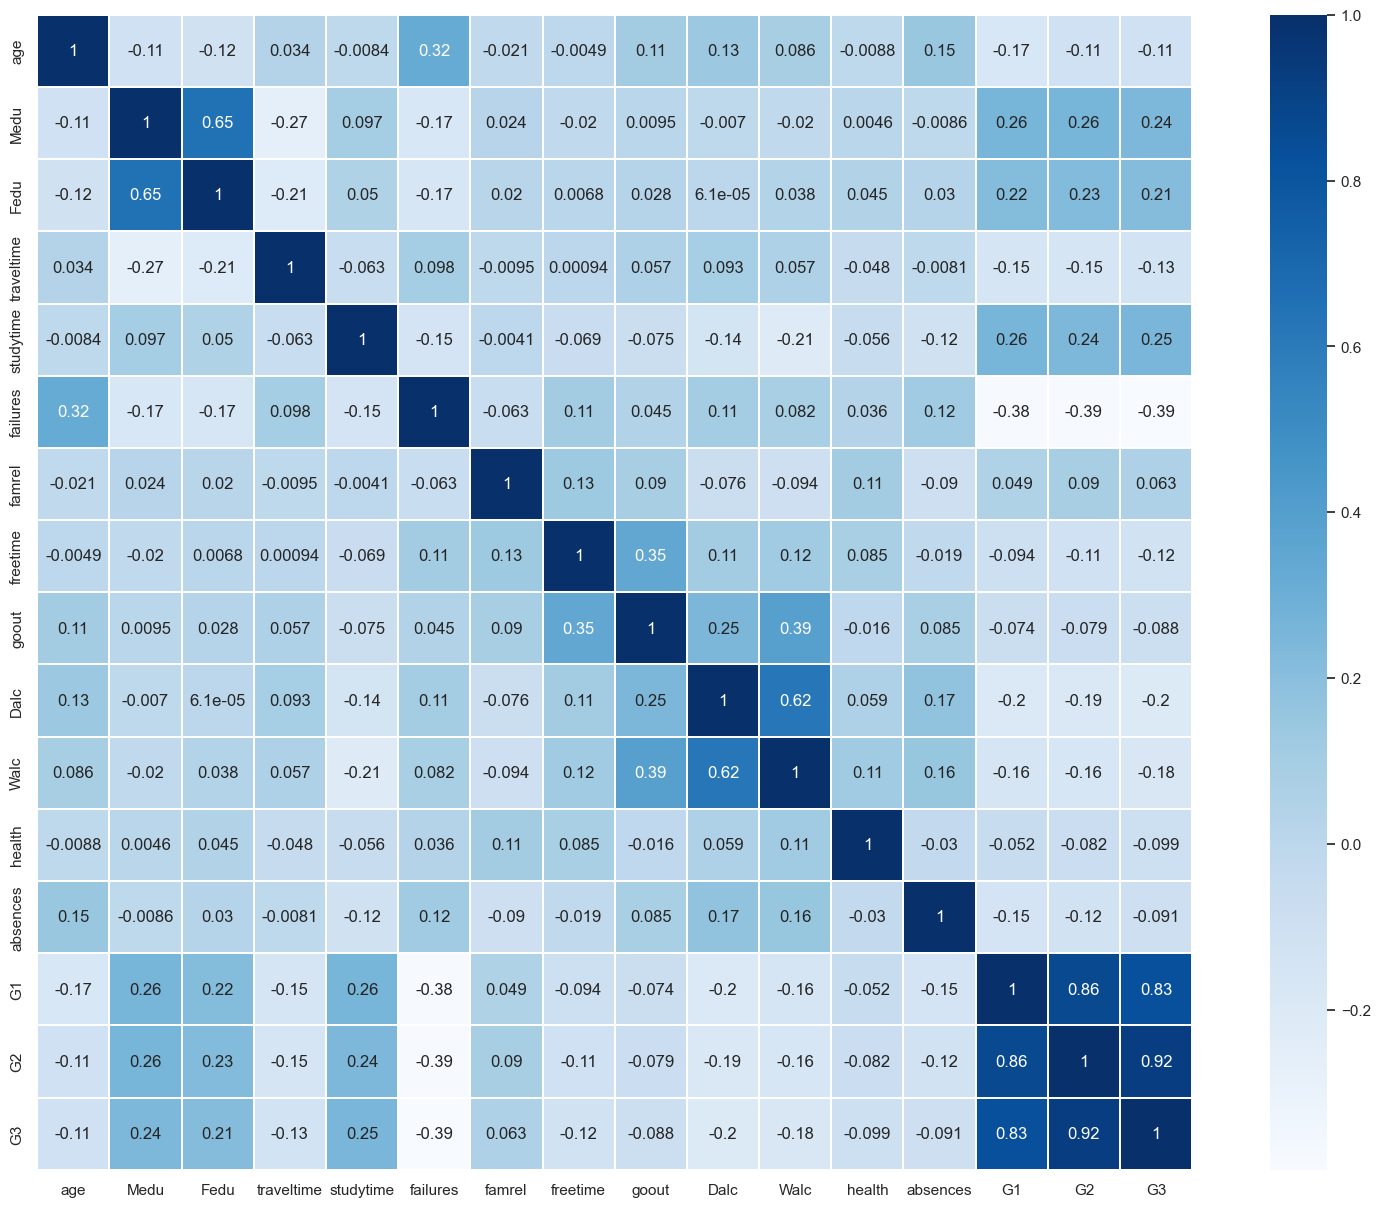

In [189]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), linewidths=0.01,
            square=True,annot=True,cmap="Blues")

Kolom G2 dan G3 memiliki korelasi tertinggi yaitu 0.92.

Kami memilih kolom G3 sebagai target. Hal ini didasarkan pada penjelasan publisher dataset. Berikut adalah korelasi kolom G3 dengan kolom yang bertipe data numerik lainnya.

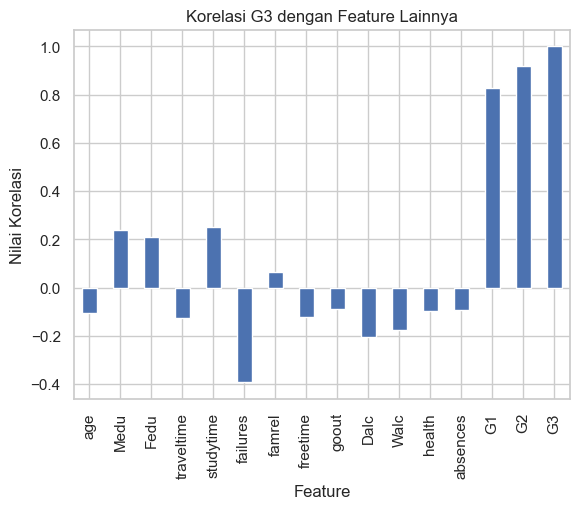

In [190]:
df.select_dtypes(include='number').corr()['G3'].plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel("Nilai Korelasi")
plt.title("Korelasi G3 dengan Feature Lainnya")
plt.show()

Kami juga ingin menganalisis kolom G3 dengan kolom lainnya yang bernilai kategorikal. Maka dilakukan binary encoding dan one hot ecoding terhadap kolom kategorikal.

In [191]:
df_numeric = df.copy()

Menampilkan semua unique value yang berada di setiap kolom

In [192]:
#Show unique value
for column in df_numeric.columns:
    unique_values = df_numeric[column].unique()
    print(f"Column: {column}")
    print(unique_values)

Column: school
['GP' 'MS']
Column: sex
['F' 'M']
Column: age
[18 17 15 16 19 22 20 21]
Column: address
['U' 'R']
Column: famsize
['GT3' 'LE3']
Column: Pstatus
['A' 'T']
Column: Medu
[4 1 3 2 0]
Column: Fedu
[4 1 2 3 0]
Column: Mjob
['at_home' 'health' 'other' 'services' 'teacher']
Column: Fjob
['teacher' 'other' 'services' 'health' 'at_home']
Column: reason
['course' 'other' 'home' 'reputation']
Column: guardian
['mother' 'father' 'other']
Column: traveltime
[2 1 3 4]
Column: studytime
[2 3 1 4]
Column: failures
[0 3 1 2]
Column: schoolsup
['yes' 'no']
Column: famsup
['no' 'yes']
Column: paid
['no' 'yes']
Column: activities
['no' 'yes']
Column: nursery
['yes' 'no']
Column: higher
['yes' 'no']
Column: internet
['no' 'yes']
Column: romantic
['no' 'yes']
Column: famrel
[4 5 3 1 2]
Column: freetime
[3 2 4 1 5]
Column: goout
[4 3 2 1 5]
Column: Dalc
[1 2 5 3 4]
Column: Walc
[1 3 2 4 5]
Column: health
[3 5 1 2 4]
Column: absences
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 1

Binary dan One Hot Encoding

In [193]:
# Binary encoding
df_numeric['school'] = df_numeric['school'].replace({'GP': 0, 'MS': 1})

df_numeric['sex'] = df_numeric['sex'].replace({'F': 0, 'M': 1})

df_numeric['address'] = df_numeric['address'].replace({'U': 0, 'R': 1})

df_numeric['famsize'] = df_numeric['famsize'].replace({'LE3': 0, 'GT3': 1})

df_numeric['Pstatus'] = df_numeric['Pstatus'].replace({'T': 0, 'A': 1})

df_numeric['schoolsup'] = df_numeric['schoolsup'].replace({'no': 0, 'yes': 1})

df_numeric['famsup'] = df_numeric['famsup'].replace({'no': 0, 'yes': 1})

df_numeric['paid'] = df_numeric['paid'].replace({'no': 0, 'yes': 1})

df_numeric['activities'] = df_numeric['activities'].replace({'no': 0, 'yes': 1})

df_numeric['nursery'] = df_numeric['nursery'].replace({'no': 0, 'yes': 1})

df_numeric['higher'] = df_numeric['higher'].replace({'no': 0, 'yes': 1})

df_numeric['internet'] = df_numeric['internet'].replace({'no': 0, 'yes': 1})

df_numeric['romantic'] = df_numeric['romantic'].replace({'no': 0, 'yes': 1})


In [194]:
# One hot encoding
df_numeric = pd.get_dummies(df_numeric, columns = ['Mjob', 'Fjob','reason','guardian'])
df_numeric.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,1,1,4,4,2,2,...,False,False,True,True,False,False,False,False,True,False
1,0,0,17,0,1,0,1,1,1,2,...,True,False,False,True,False,False,False,True,False,False
2,0,0,15,0,0,0,1,1,1,2,...,True,False,False,False,False,True,False,False,True,False
3,0,0,15,0,1,0,4,2,1,3,...,False,True,False,False,True,False,False,False,True,False
4,0,0,16,0,1,0,3,3,1,2,...,True,False,False,False,True,False,False,True,False,False


In [195]:
df_numeric = df_numeric*1 # Convert boolean to int

Hasil binary dan one hot encoding

In [196]:
#Show unique value
for column in df_numeric.columns:
    unique_values = df_numeric[column].unique()
    print(f"Column: {column}")
    print(unique_values)

Column: school
[0 1]
Column: sex
[0 1]
Column: age
[18 17 15 16 19 22 20 21]
Column: address
[0 1]
Column: famsize
[1 0]
Column: Pstatus
[1 0]
Column: Medu
[4 1 3 2 0]
Column: Fedu
[4 1 2 3 0]
Column: traveltime
[2 1 3 4]
Column: studytime
[2 3 1 4]
Column: failures
[0 3 1 2]
Column: schoolsup
[1 0]
Column: famsup
[0 1]
Column: paid
[0 1]
Column: activities
[0 1]
Column: nursery
[1 0]
Column: higher
[1 0]
Column: internet
[0 1]
Column: romantic
[0 1]
Column: famrel
[4 5 3 1 2]
Column: freetime
[3 2 4 1 5]
Column: goout
[4 3 2 1 5]
Column: Dalc
[1 2 5 3 4]
Column: Walc
[1 3 2 4 5]
Column: health
[3 5 1 2 4]
Column: absences
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
Column: G1
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
Column: G2
[11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
Column: G3
[11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]
Column: Mjob_at_home
[1 0]
Column: Mjob_health
[0 1]
Column: Mjob_other
[0 1]
Column: Mjob_services
[0 1]


Menampilkan ulang nilai korelasi G3 dengan kolom lain yang sudah di encoding

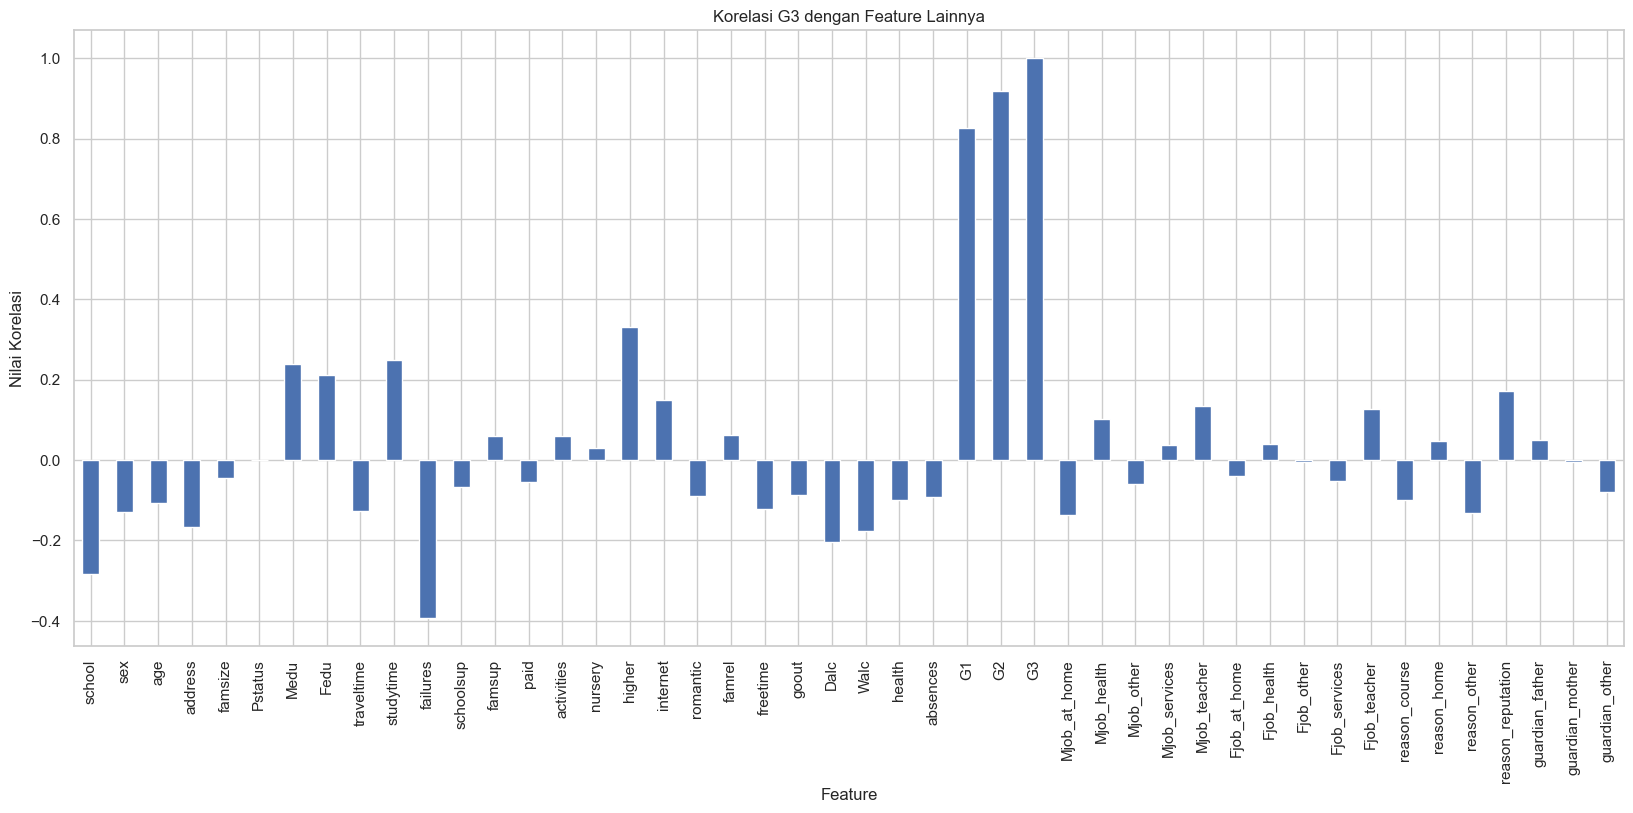

In [197]:
plt.figure(figsize=(20, 8))
df_numeric.select_dtypes(include='number').corr()['G3'].plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel("Nilai Korelasi")
plt.title("Korelasi G3 dengan Feature Lainnya")
plt.show()

**Box Plot**

Box plot untuk melihat outliers

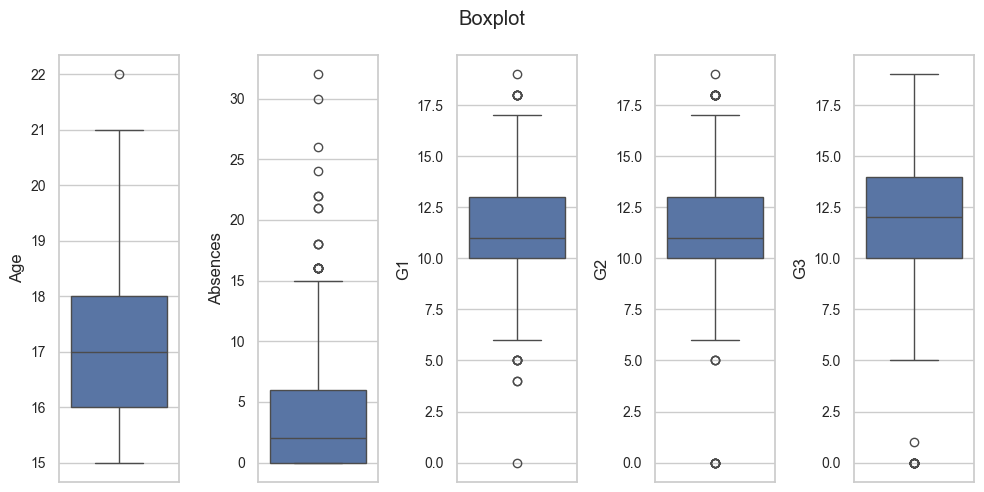

In [198]:
fig, axes = plt.subplots(1, 5, figsize=(10,5))

objectNumeric = ['age', 'absences', 'G1', 'G2', 'G3']
noObject = df_numeric[objectNumeric]
for i, col in enumerate(noObject.columns) :
    sns.boxplot(y=col, data=noObject, ax = axes[i])
    axes[i].set_ylabel(col.title())
    axes[i].tick_params(labelsize=10)


plt.suptitle('Boxplot')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

In [199]:
for col in objectNumeric :
    q1 = noObject[col].quantile(q=0.25)
    q3 = noObject[col].quantile(q=0.75)
    upperOutlier = q3 + 1.5 * (q3-q1)
    lowerOutlier = q1 - 1.5 * (q3-q1)
    upperPercentage = noObject[noObject[col] > upperOutlier][col].count()*100/len(noObject)
    lowerPercentage = noObject[noObject[col] < lowerOutlier][col].count()*100/len(noObject)

    print((" " + col + " ").center(30, '='))
    print("Upper outlier : ", round(upperPercentage, 3), "%")
    print("Lower outlier : ", round(lowerPercentage, 3), "%")
    print()

============ age =============
Upper outlier :  0.154 %
Lower outlier :  0.0 %

========== absences ==========
Upper outlier :  3.236 %
Lower outlier :  0.0 %

============= G1 =============
Upper outlier :  1.233 %
Lower outlier :  1.233 %

============= G2 =============
Upper outlier :  2.311 %
Lower outlier :  1.541 %

============= G3 =============
Upper outlier :  0.0 %
Lower outlier :  2.465 %



Histogram

array([[<Axes: title={'center': 'school'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'famsize'}>,
        <Axes: title={'center': 'Pstatus'}>,
        <Axes: title={'center': 'Medu'}>],
       [<Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'schoolsup'}>,
        <Axes: title={'center': 'famsup'}>,
        <Axes: title={'center': 'paid'}>],
       [<Axes: title={'center': 'activities'}>,
        <Axes: title={'center': 'nursery'}>,
        <Axes: title={'center': 'higher'}>,
        <Axes: title={'center': 'internet'}>,
        <Axes: title={'center': 'romantic'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'c

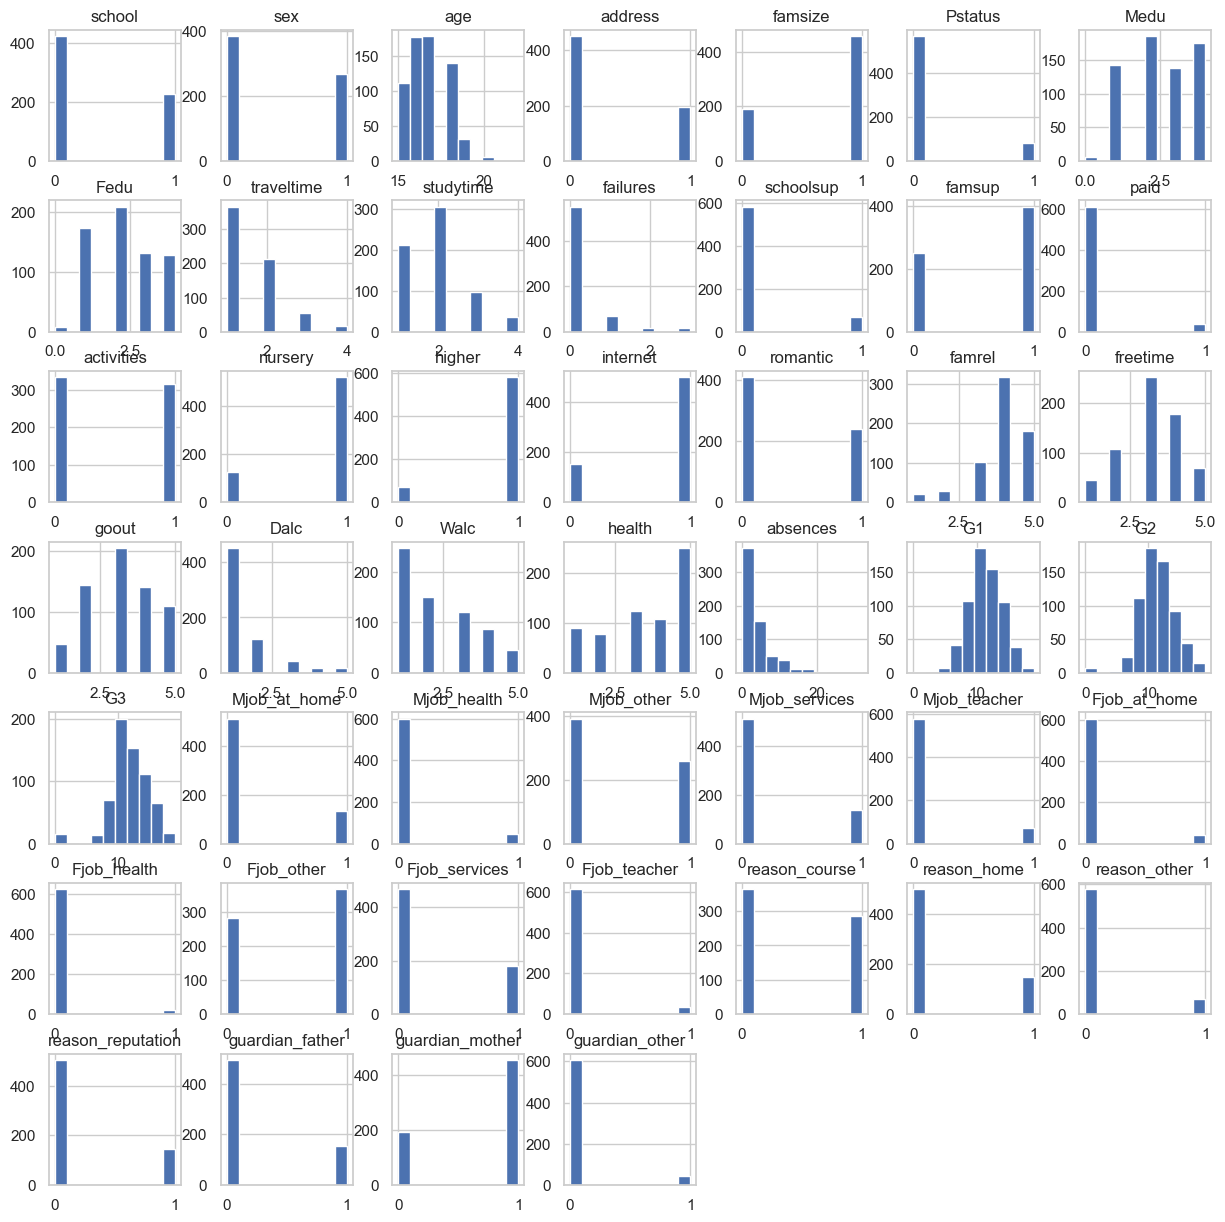

In [200]:
df_numeric.hist(figsize=(15,15))

### Data Preprocessing

Membuat duplikat dari dataframe agar data asli tidak terubah

In [201]:
data = df.copy()

Mememeriksa apakah terdapat missin value

In [202]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Binary dan One Hot Encoding

In [203]:
# Binary encoding
data['school'] = data['school'].replace({'GP': 0, 'MS': 1})

data['sex'] = data['sex'].replace({'F': 0, 'M': 1})

data['address'] = data['address'].replace({'U': 0, 'R': 1})

data['famsize'] = data['famsize'].replace({'LE3': 0, 'GT3': 1})

data['Pstatus'] = data['Pstatus'].replace({'T': 0, 'A': 1})

data['schoolsup'] = data['schoolsup'].replace({'no': 0, 'yes': 1})

data['famsup'] = data['famsup'].replace({'no': 0, 'yes': 1})

data['paid'] = data['paid'].replace({'no': 0, 'yes': 1})

data['activities'] = data['activities'].replace({'no': 0, 'yes': 1})

data['nursery'] = data['nursery'].replace({'no': 0, 'yes': 1})

data['higher'] = data['higher'].replace({'no': 0, 'yes': 1})

data['internet'] = data['internet'].replace({'no': 0, 'yes': 1})

data['romantic'] = data['romantic'].replace({'no': 0, 'yes': 1})

In [204]:
#One hot encoding
data = pd.get_dummies(data, columns = ['Mjob', 'Fjob','reason','guardian'])

In [205]:
data = data*1 # Convert boolean to int
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,1,1,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,1,0,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,0,0,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,1,0,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,1,0,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


**Box Plot**

Box plot untuk melihat outliers

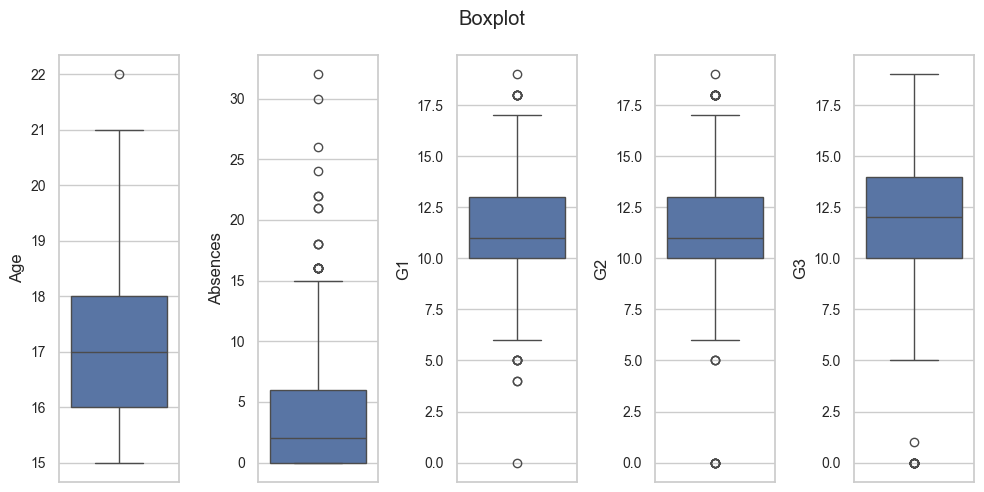

In [206]:
fig, axes = plt.subplots(1, 5, figsize=(10,5))

objectNumeric = ['age', 'absences', 'G1', 'G2', 'G3']
noObject = data[objectNumeric]
for i, col in enumerate(noObject.columns) :
    sns.boxplot(y=col, data=noObject, ax = axes[i])
    axes[i].set_ylabel(col.title())
    axes[i].tick_params(labelsize=10)


plt.suptitle('Boxplot')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

In [207]:
for col in objectNumeric :
    q1 = noObject[col].quantile(q=0.25)
    q3 = noObject[col].quantile(q=0.75)
    upperOutlier = q3 + 1.5 * (q3-q1)
    lowerOutlier = q1 - 1.5 * (q3-q1)
    upperPercentage = noObject[noObject[col] > upperOutlier][col].count()*100/len(noObject)
    lowerPercentage = noObject[noObject[col] < lowerOutlier][col].count()*100/len(noObject)

    print((" " + col + " ").center(30, '='))
    print("Upper outlier : ", round(upperPercentage, 3), "%")
    print("Lower outlier : ", round(lowerPercentage, 3), "%")
    print()

============ age =============
Upper outlier :  0.154 %
Lower outlier :  0.0 %

========== absences ==========
Upper outlier :  3.236 %
Lower outlier :  0.0 %

============= G1 =============
Upper outlier :  1.233 %
Lower outlier :  1.233 %

============= G2 =============
Upper outlier :  2.311 %
Lower outlier :  1.541 %

============= G3 =============
Upper outlier :  0.0 %
Lower outlier :  2.465 %



**Handle Outlier**

Mengganti nilai outlier dengan

In [208]:
def replace_oulier(data):
  data = data.copy()
  for col in data.columns :
    q1 = data[col].quantile(q=0.25)
    q3 = data[col].quantile(q=0.75)
    upperOutlier = q3 + 1.5 * (q3-q1)
    lowerOutlier = q1 - 1.5 * (q3-q1)

    data.loc[data[col] > upperOutlier, col] = upperOutlier
    data.loc[data[col] < lowerOutlier, col] = lowerOutlier

  return data

ro = replace_oulier(data)


C:\Users\asus\AppData\Local\Temp\ipykernel_19360\4032923952.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] > upperOutlier, col] = upperOutlier
C:\Users\asus\AppData\Local\Temp\ipykernel_19360\4032923952.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] > upperOutlier, col] = upperOutlier
C:\Users\asus\AppData\Local\Temp\ipykernel_19360\4032923952.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] > upperOutlier, col] = upperOutlier
C

Box plot sesudah menangani outlier

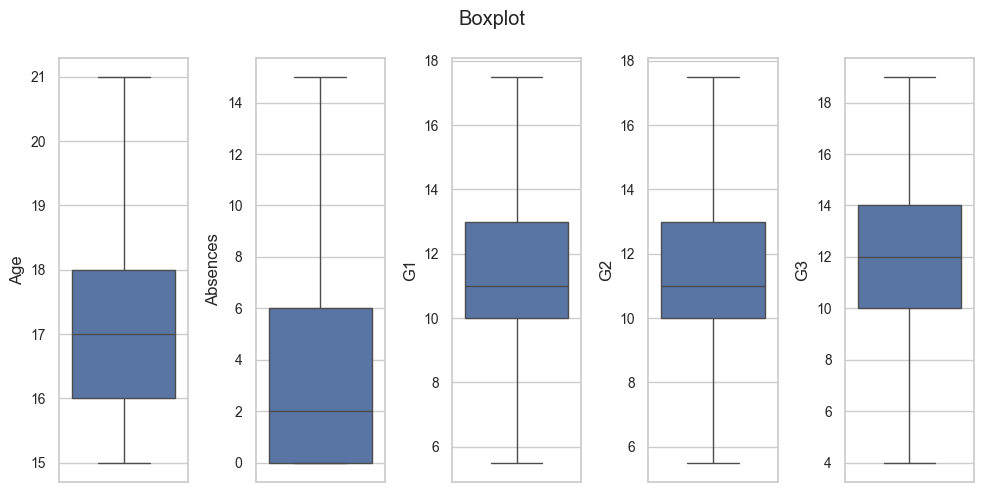


<class 'str'>
====== age ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
<class 'str'>
====== absences ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
<class 'str'>
====== G1 ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
<class 'str'>
====== G2 ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %
<class 'str'>
====== G3 ======
Upper outlier :  0.0 %
Lower outlier :  0.0 %


In [209]:
fig, axes = plt.subplots(1, 5, figsize=(10,5))

objectNumeric = [i for i in ro.columns if i == 'age' or i == 'absences' or i=='G1' or i =='G2' or i=='G3' ]
for i, col in enumerate(objectNumeric) :
    sns.boxplot(y=col, data=ro, ax = axes[i])
    axes[i].set_ylabel(col.title())
    axes[i].tick_params(labelsize=10)


plt.suptitle('Boxplot')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

print()
#Persentase outlier
for col in objectNumeric :
    print(type(col))
    q1 = ro[col].quantile(q=0.25)
    q3 = ro[col].quantile(q=0.75)
    upperOutlier = q3 + 1.5 * (q3-q1)
    lowerOutlier = q1 - 1.5 * (q3-q1)
    upperPercentage = ro[ro[col] > upperOutlier][col].count()*100/len(ro)
    lowerPercentage = ro[ro[col] < lowerOutlier][col].count()*100/len(ro)

    print("======", col, "======")
    print("Upper outlier : ", round(upperPercentage, 3), "%")
    print("Lower outlier : ", round(lowerPercentage, 3), "%")



Korelasi seluruh kolom dengan G3

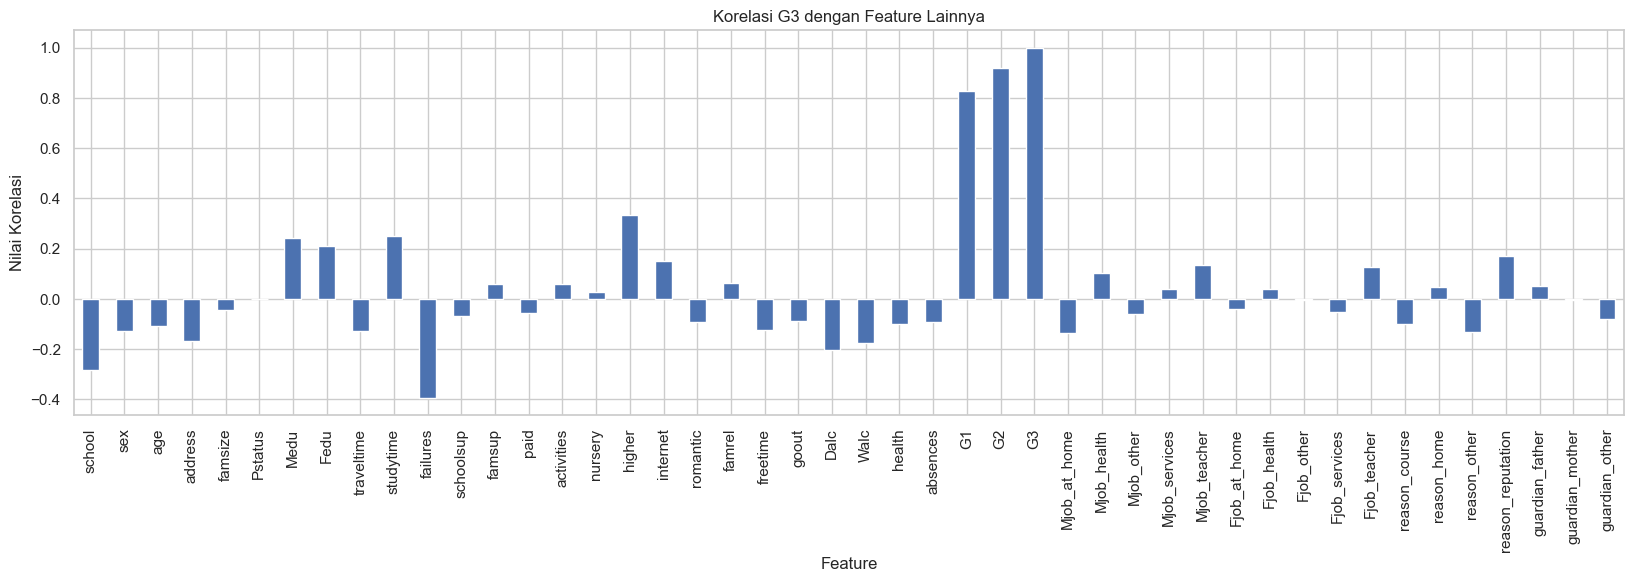

In [210]:
plt.figure(figsize=(20, 5))
data.select_dtypes(include='number').corr()['G3'].plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel("Nilai Korelasi")
plt.title("Korelasi G3 dengan Feature Lainnya")
plt.show()

Setup X dan y

In [211]:
X = data.drop(columns=['G3'])
y = data['G3']
X_pos = data[['Medu', 'Fedu', 'studytime', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'G1', 'G2', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_teacher','reason_home', 'reason_reputation', 'guardian_father']]
y_pos = data[['G3']]

Histogram

array([[<Axes: title={'center': 'school'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'famsize'}>,
        <Axes: title={'center': 'Pstatus'}>,
        <Axes: title={'center': 'Medu'}>],
       [<Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'schoolsup'}>,
        <Axes: title={'center': 'famsup'}>,
        <Axes: title={'center': 'paid'}>],
       [<Axes: title={'center': 'activities'}>,
        <Axes: title={'center': 'nursery'}>,
        <Axes: title={'center': 'higher'}>,
        <Axes: title={'center': 'internet'}>,
        <Axes: title={'center': 'romantic'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'c

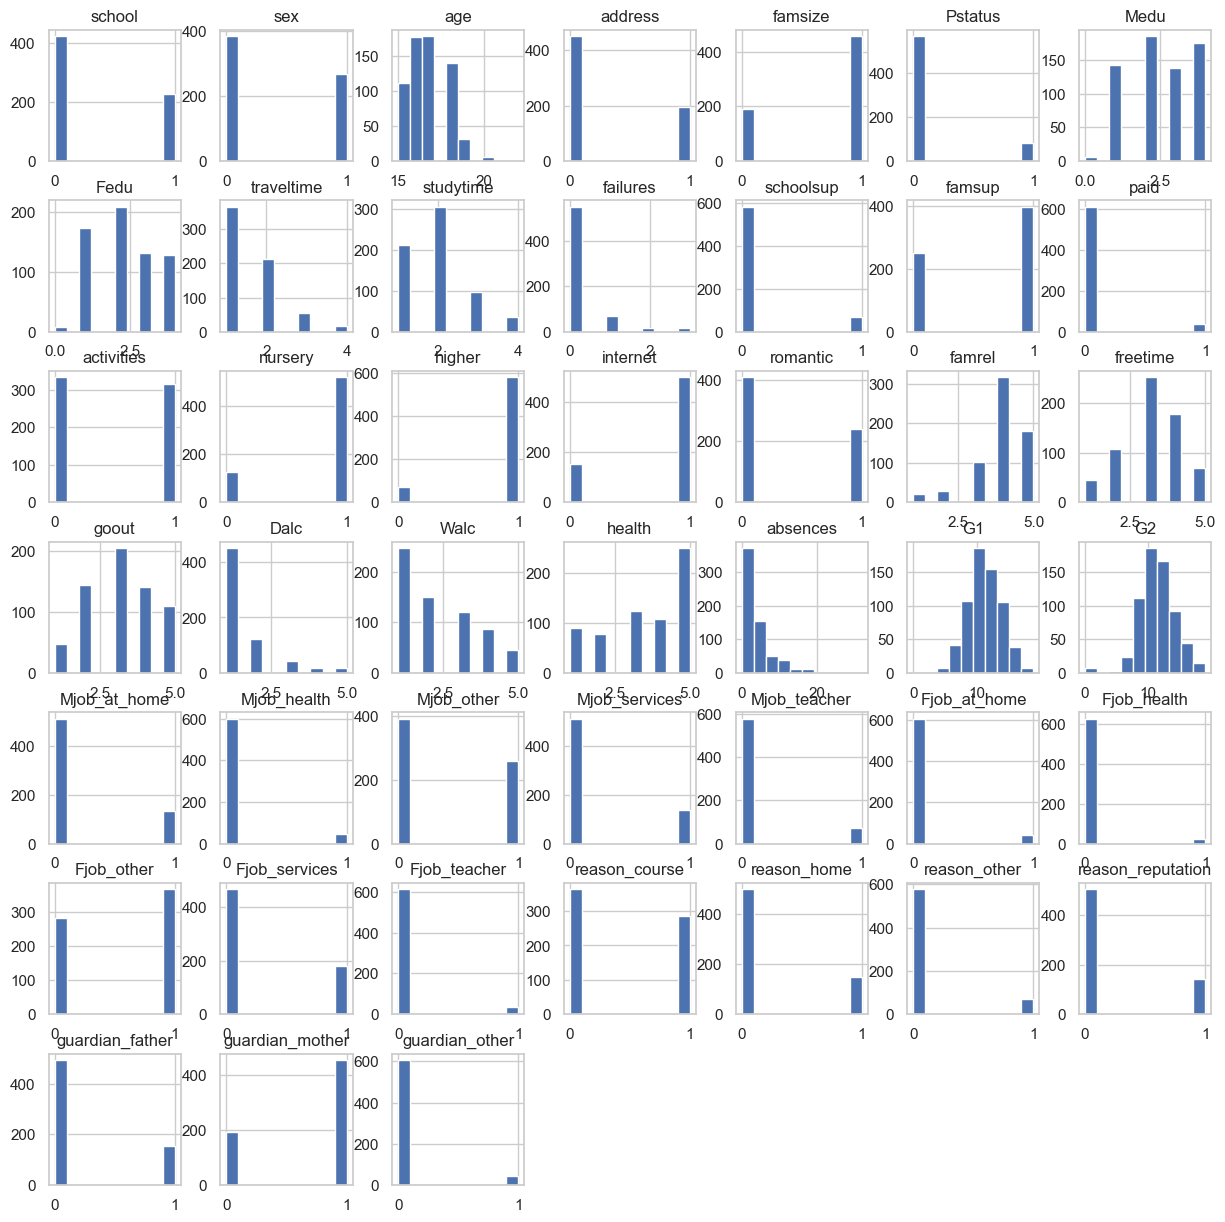

In [212]:
X.hist(figsize=(15,15))

array([[<Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'famsup'}>],
       [<Axes: title={'center': 'activities'}>,
        <Axes: title={'center': 'nursery'}>,
        <Axes: title={'center': 'higher'}>,
        <Axes: title={'center': 'internet'}>],
       [<Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'Mjob_health'}>],
       [<Axes: title={'center': 'Mjob_services'}>,
        <Axes: title={'center': 'Mjob_teacher'}>,
        <Axes: title={'center': 'Fjob_health'}>,
        <Axes: title={'center': 'Fjob_teacher'}>],
       [<Axes: title={'center': 'reason_home'}>,
        <Axes: title={'center': 'reason_reputation'}>,
        <Axes: title={'center': 'guardian_father'}>, <Axes: >]],
      dtype=object)

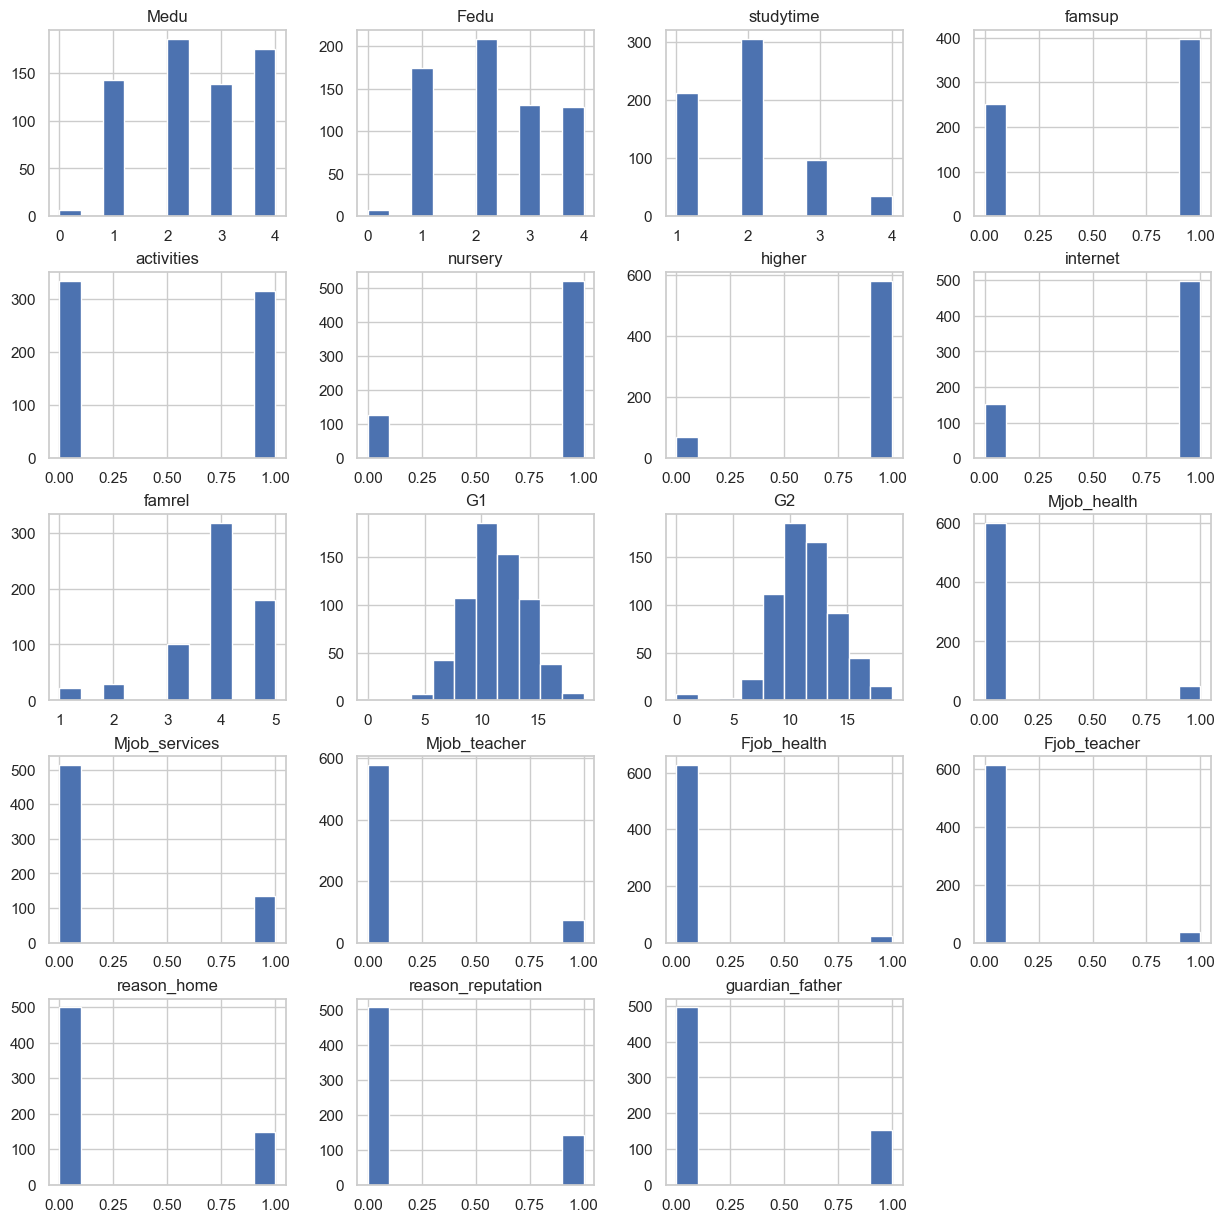

In [213]:
X_pos.hist(figsize=(15,15))

Normalisasi

In [214]:
def minMaxScaler(df) :
    scaledDf = df.copy()

    for col in df.columns :
        unique_values = df[col].unique()
        print(f"colum: {col}, length: {len(unique_values)}")
        if len(unique_values) > 2:
          minVal = df[col].min()
          maxVal = df[col].max()
          scaledDf[col] = (df[col] - minVal) / (maxVal - minVal)

    return scaledDf

**Histogram setelah normalisasi**

Normalisasi hanya dilakukan terhadap kolom yang range nilai tidak 0-1

colum: school, length: 2
colum: sex, length: 2
colum: age, length: 8
colum: address, length: 2
colum: famsize, length: 2
colum: Pstatus, length: 2
colum: Medu, length: 5
colum: Fedu, length: 5
colum: traveltime, length: 4
colum: studytime, length: 4
colum: failures, length: 4
colum: schoolsup, length: 2
colum: famsup, length: 2
colum: paid, length: 2
colum: activities, length: 2
colum: nursery, length: 2
colum: higher, length: 2
colum: internet, length: 2
colum: romantic, length: 2
colum: famrel, length: 5
colum: freetime, length: 5
colum: goout, length: 5
colum: Dalc, length: 5
colum: Walc, length: 5
colum: health, length: 5
colum: absences, length: 24
colum: G1, length: 17
colum: G2, length: 16
colum: Mjob_at_home, length: 2
colum: Mjob_health, length: 2
colum: Mjob_other, length: 2
colum: Mjob_services, length: 2
colum: Mjob_teacher, length: 2
colum: Fjob_at_home, length: 2
colum: Fjob_health, length: 2
colum: Fjob_other, length: 2
colum: Fjob_services, length: 2
colum: Fjob_teacher

array([[<Axes: title={'center': 'school'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'famsize'}>,
        <Axes: title={'center': 'Pstatus'}>,
        <Axes: title={'center': 'Medu'}>],
       [<Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'schoolsup'}>,
        <Axes: title={'center': 'famsup'}>,
        <Axes: title={'center': 'paid'}>],
       [<Axes: title={'center': 'activities'}>,
        <Axes: title={'center': 'nursery'}>,
        <Axes: title={'center': 'higher'}>,
        <Axes: title={'center': 'internet'}>,
        <Axes: title={'center': 'romantic'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'c

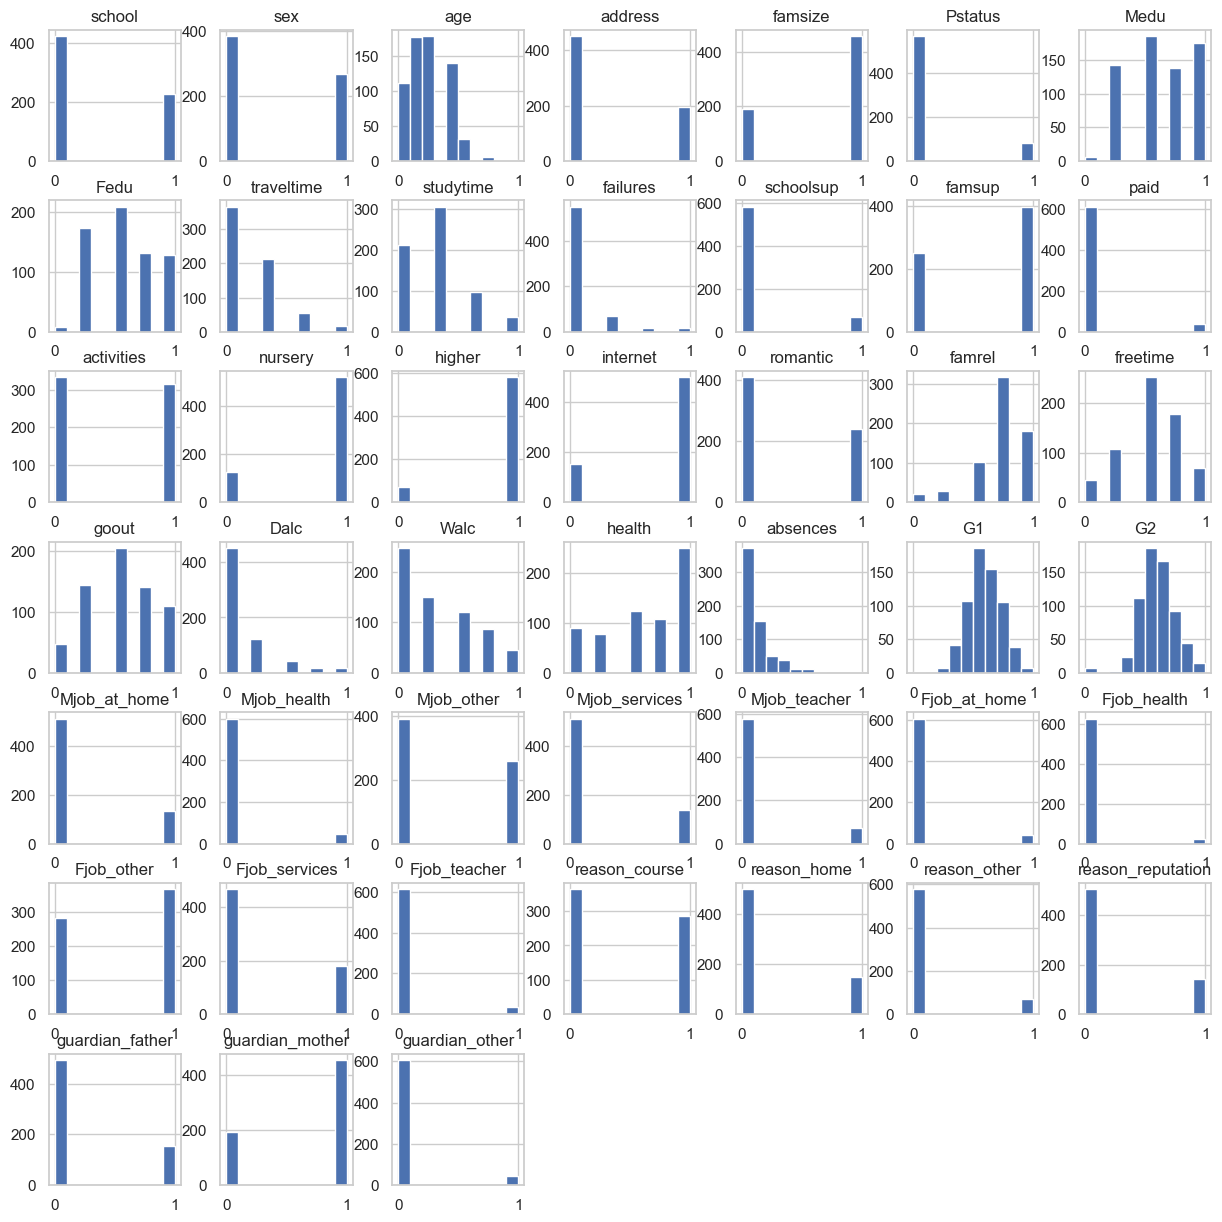

In [215]:
X = minMaxScaler(X)
X.hist(figsize=(15,15))

colum: Medu, length: 5
colum: Fedu, length: 5
colum: studytime, length: 4
colum: famsup, length: 2
colum: activities, length: 2
colum: nursery, length: 2
colum: higher, length: 2
colum: internet, length: 2
colum: famrel, length: 5
colum: G1, length: 17
colum: G2, length: 16
colum: Mjob_health, length: 2
colum: Mjob_services, length: 2
colum: Mjob_teacher, length: 2
colum: Fjob_health, length: 2
colum: Fjob_teacher, length: 2
colum: reason_home, length: 2
colum: reason_reputation, length: 2
colum: guardian_father, length: 2


array([[<Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'famsup'}>],
       [<Axes: title={'center': 'activities'}>,
        <Axes: title={'center': 'nursery'}>,
        <Axes: title={'center': 'higher'}>,
        <Axes: title={'center': 'internet'}>],
       [<Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'Mjob_health'}>],
       [<Axes: title={'center': 'Mjob_services'}>,
        <Axes: title={'center': 'Mjob_teacher'}>,
        <Axes: title={'center': 'Fjob_health'}>,
        <Axes: title={'center': 'Fjob_teacher'}>],
       [<Axes: title={'center': 'reason_home'}>,
        <Axes: title={'center': 'reason_reputation'}>,
        <Axes: title={'center': 'guardian_father'}>, <Axes: >]],
      dtype=object)

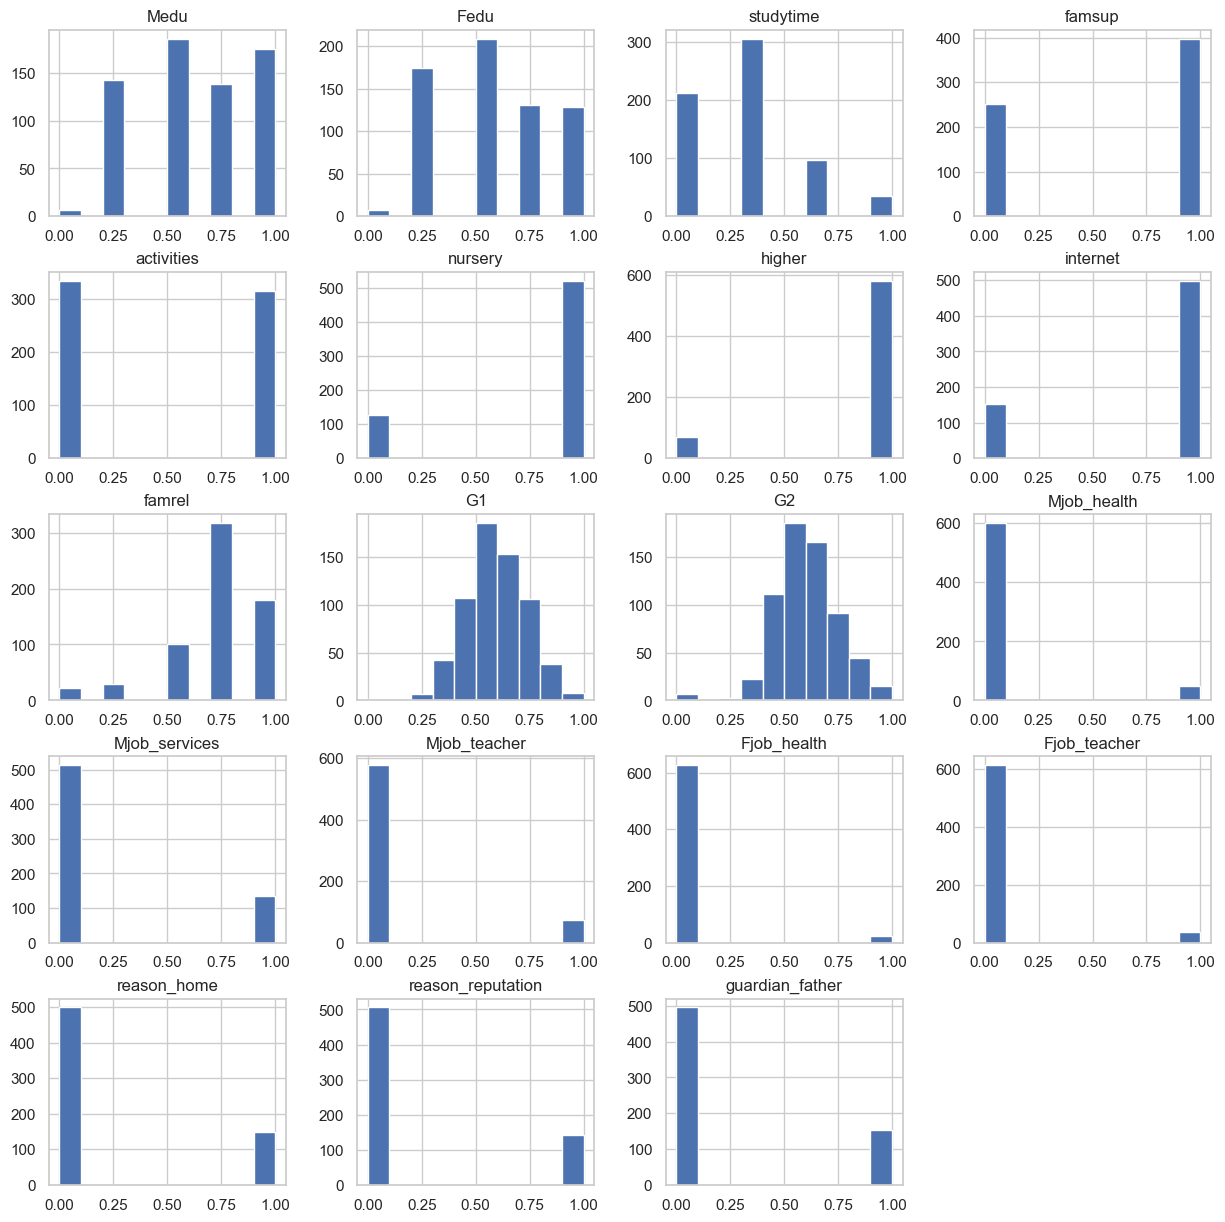

In [216]:
X_pos = minMaxScaler(X_pos)
X_pos.hist(figsize=(15,15))

## Eksplorasi Kode

### Ringkasan Metode
Artificial Neural Network (ANN) adalah model Machine Learning yang terinspirasi dari struktur jaringan saraf manusia. Ini terdiri dari node atau neuron buatan yang terhubung dalam lapisan-lapisan. Setiap neuron menerima input, melakukan operasi matematika pada input tersebut, dan mengirimkan hasilnya ke neuron berikutnya. Pada model ANN terdapat beberapa hyperparameter yang dapat berpengaruh terhadap hasil model antara lain:
1. Activation function : Activation function yang berbeda dapat menghasilkan hasil yang berbeda, dan dapat mempengaruh kecepatan konvergensi dan performa model.
2. Jumlah Epoch : Jumlah epoch dapat mempengaruhi sejauh mana model ANN belajar dari data.
3. Jumlah Node : Jumlah node di hidden layer dapat mempengaruhi loss pada model.

### Training menggunakan feature yang berkorelasi positif dengan target (G3)

Melakukan split data

In [217]:
xTrain, xTest, yTrain, yTest = train_test_split(X_pos, y_pos, test_size=0.2, random_state=0)

Function compile

In [218]:
def trainModel(train, epoch, optimizer='Adam', loss='mean_squared_error') :
    model.compile(optimizer=optimizer, loss=loss)

    history = model.fit(train[0].values, train[1].values, epochs=epoch, validation_data=(train[2].values, train[3].values))
    return history

Baseline model

In [219]:
model = tf.keras.models.Sequential ([
    tf.keras.layers.Dense(83, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear'),
])

history = trainModel([xTrain, yTrain, xTest, yTest], 50)


Epoch 1/50


17/17 [==============================] - 1s 9ms/step - loss: 176.3579 - val_loss: 162.6940
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 148.8688 - val_loss: 139.7912
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 130.5906 - val_loss: 125.8741
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 119.9641 - val_loss: 118.0348
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 113.7872 - val_loss: 113.0955
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 109.6728 - val_loss: 109.4781
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 106.4819 - val_loss: 106.5330
Epoch 8/50
17/17 [==============================] - 0s 3ms/step - loss: 103.7854 - val_loss: 103.9292
Epoch 9/50
17/17 [==============================] - 0s 3ms/step - loss: 101.3357 - val_loss: 101.4929
Epoch 10/50
17/17 [==============================] - 0s 4ms/step - loss: 99.0014 - val_loss: 

Graph actual vs predict & Training loss

5/5 [==============================] - 0s 2ms/step


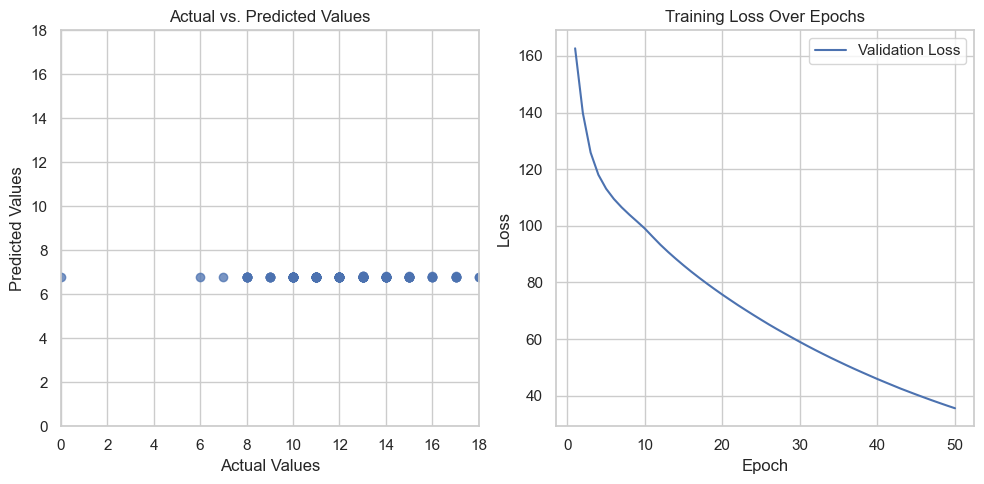

In [220]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

yPred = model.predict(xTest.values)

# Membuat scatter plot untuk membandingkan hasil aktual dan hasil prediksi
axes[0].scatter(yTest.values, yPred, alpha=0.75)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Actual vs. Predicted Values')
axes[0].set_ylim(min(yTest.values), max(yTest.values))
axes[0].set_xlim(min(yTest.values), max(yTest.values))

# Extract the loss values from the training history
loss = history.history['val_loss']

# Create a list of epoch numbers (1 to the number of epochs)
epochs = range(1, len(loss) + 1)

# Plot the loss over epochs
axes[1].plot(epochs, loss, label='Validation Loss')
axes[1].set_title('Training Loss Over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


Mencari epoch terbaik untuk base model

Epoch 1/50
17/17 [==============================] - 1s 9ms/step - loss: 130.7584 - val_loss: 123.3272
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 115.1340 - val_loss: 110.3732
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 104.5811 - val_loss: 101.5826
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 97.2023 - val_loss: 95.2002
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 91.6258 - val_loss: 90.0501
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 86.9094 - val_loss: 85.4731
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 82.6751 - val_loss: 81.2836
Epoch 8/50
17/17 [==============================] - 0s 3ms/step - loss: 78.8046 - val_loss: 77.4320
Epoch 9/50
17/17 [==============================] - 0s 4ms/step - loss: 75.1983 - val_loss: 73.8745
Epoch 10/50
17/17 [==============================] - 0s 3ms/step - loss: 71.8700 - val_loss: 7

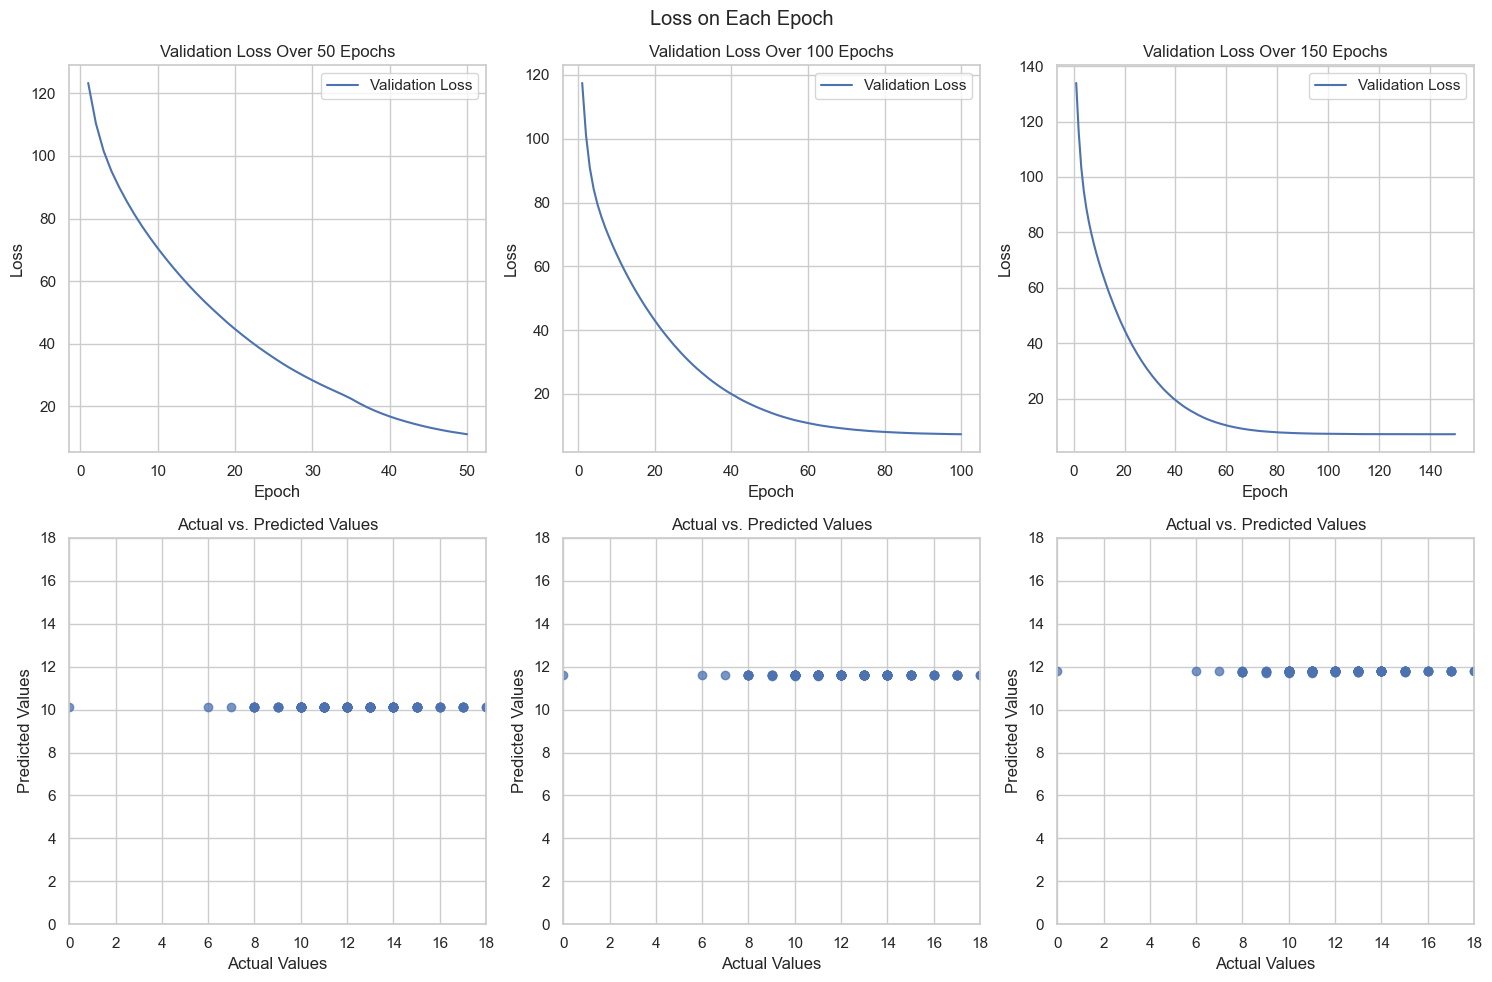

In [221]:
#Mencari epoch
nEpochs = [50, 100, 150]

fig, axes = plt.subplots(2, len(nEpochs), figsize=(15,10))

for i, epoch in enumerate(nEpochs) :
    model = tf.keras.models.Sequential ([
        tf.keras.layers.Dense(83, activation='sigmoid'),
        tf.keras.layers.Dense(16, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='linear'),
    ])

    history = trainModel([xTrain, yTrain, xTest, yTest], epoch)

    # Extract the loss values from the training history
    loss = history.history['val_loss']

    # Create a list of epoch numbers (1 to the number of epochs)
    epochs = range(1, len(loss) + 1)

    # Plot the loss over epochs
    axes[0][i].plot(epochs, loss, label='Validation Loss')
    axes[0][i].set_title(f'Validation Loss Over {epoch} Epochs')
    axes[0][i].set_xlabel('Epoch')
    axes[0][i].set_ylabel('Loss')

    axes[0][i].legend()

    yPred = model.predict(xTest.values)

    axes[1][i].scatter(yTest.values, yPred, alpha=0.75)
    axes[1][i].set_xlabel('Actual Values')
    axes[1][i].set_ylabel('Predicted Values')
    axes[1][i].set_title('Actual vs. Predicted Values')
    axes[1][i].set_ylim(min(yTest.values), max(yTest.values))
    axes[1][i].set_xlim(min(yTest.values), max(yTest.values))

plt.suptitle('Loss on Each Epoch')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()


Melakukan model exploration terhadap 3 fungsi aktivasi berbeda, 2 layer berbeda, dan nNodes berbeda.

In [222]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [223]:
# Model Exploration (at least 3 scheme)
# Write your code here
activationFunction = ["relu", "tanh"]
nLayers = [1]
nNodes = [16]

columns_count = len(X_pos.columns)

#Membuat 3 model
models = []
for activation in activationFunction :
    for layer in nLayers :
        for node in nNodes :

            modelData = {
                "name" : "",
                "layer" : [],
                "loss" : [],
                "lossPercent" : [],
                "model" : '',
                "history" : ''
            }
            lossArr = []

            for iTrain, iTest in kf.split(X_pos) :
                layerData = []
                model = tf.keras.models.Sequential ([])

                model.add(tf.keras.layers.Dense(columns_count, activation=activation))
                layerData.append({
                    "num" : 0,
                    "node" : columns_count,
                    "activation" : activation
                })
                for i in range(layer) :
                    model.add(tf.keras.layers.Dense(node, activation=activation))
                    layerData.append({
                        "num" : i+1,
                        "node" : node,
                        "activation" : activation
                    })
                model.add(tf.keras.layers.Dense(1, activation='linear'))
                layerData.append({
                    "num" : layer+1,
                    "node" : 1,
                    "activation" : "linear"
                })

                xTrain = X_pos.iloc[iTrain]
                yTrain = y_pos.iloc[iTrain]
                xTest = X_pos.iloc[iTest]
                yTest = y_pos.iloc[iTest]

                history = trainModel([xTrain, yTrain, xTest, yTest], 75)

                #Val Score & MAPE
                valData = model.predict(xTest.values)

                nonzero_indices = yTest != 0
                filtered_valData = valData[nonzero_indices]
                filtered_yTest = yTest[nonzero_indices]
                print("Panjang val data: ", len(valData))
                print("Panjang filtered val data: ", len(filtered_valData))
                valScore = np.mean((valData - yTest)**2)
                #valPercent = np.mean((np.abs(valData-yTest))/(yTest)*100)
                valPercent = np.mean((np.abs(filtered_valData - filtered_yTest)) / (filtered_yTest) * 100)

                modelData["loss"].append(valScore)
                modelData["lossPercent"].append(valPercent)

            modelData["name"] = f"model_{activation}_{layer}_{node}"
            modelData["layer"] = layerData
            modelData["model"] = model
            modelData["history"] = history

            models.append(modelData)

Epoch 1/75


17/17 [==============================] - 1s 9ms/step - loss: 156.1781 - val_loss: 153.7978
Epoch 2/75
17/17 [==============================] - 0s 4ms/step - loss: 146.4332 - val_loss: 144.1832
Epoch 3/75
17/17 [==============================] - 0s 4ms/step - loss: 136.3569 - val_loss: 132.1234
Epoch 4/75
17/17 [==============================] - 0s 3ms/step - loss: 122.2320 - val_loss: 114.2315
Epoch 5/75
17/17 [==============================] - 0s 4ms/step - loss: 101.8327 - val_loss: 89.1816
Epoch 6/75
17/17 [==============================] - 0s 4ms/step - loss: 74.9121 - val_loss: 59.7769
Epoch 7/75
17/17 [==============================] - 0s 3ms/step - loss: 45.8343 - val_loss: 31.5072
Epoch 8/75
17/17 [==============================] - 0s 4ms/step - loss: 22.5776 - val_loss: 13.2123
Epoch 9/75
17/17 [==============================] - 0s 4ms/step - loss: 11.0469 - val_loss: 8.0198
Epoch 10/75
17/17 [==============================] - 0s 4ms/step - loss: 9.3459 - val_loss: 7.6465
Epoc

Traceback (most recent call last):
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\asus\AppData\Local\Temp\ipykernel_19360\3176765486.py", line 65, in <module>
    valPercent = np.mean((np.abs(filtered_valData - filtered_yTest)) / (np.abs(filtered_yTest)) * 100)
                                 ~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\generic.py", line 2102, in __array_ufunc__
    return arraylike.array_ufunc(self, ufunc, method, *inputs, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py", line 273, in array_ufunc
    result = maybe_dispatch_ufunc_to_dunder_op(self, ufunc, method, *inputs, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [231]:
print(len(nonzero_indices))
print(len(filtered_valData))
print(len(filtered_yTest))

130
129
130


In [237]:
nonzero_indices

,G3
1,True
8,True
10,True
14,True
17,True
...,...
628,True
641,True
643,True
644,True


In [236]:
count_of_zeros = np.count_nonzero(valData == 0)
print("Number of occurrences of 0:", count_of_zeros)

Number of occurrences of 0: 0


In [224]:
# Membuat DataFrame 'resultDf' dari data yang dihasilkan
resultDf = pd.DataFrame({
    "model_name" : [m["name"] for m in models],
    "activation_func" : [m["name"].split('_')[1] for m in models],
    "layer_1" : [m["layer"][1]["node"] for m in models],
    "layer_2" : [m["layer"][2]["node"] if len(m["layer"])>3 else "-" for m in models],
    "avg_loss" : [round(np.mean(m["loss"]), 2) for m in models],
    "avg_loss (percent)" : [round(np.mean(m["lossPercent"]), 3) for m in models],
    "delta_loss" : [round(max(m["loss"]) - min(m["loss"]), 2) for m in models]
})

resultDf.sort_values(by='avg_loss')

,model_name,activation_func,layer_1,layer_2,avg_loss,avg_loss (percent),delta_loss


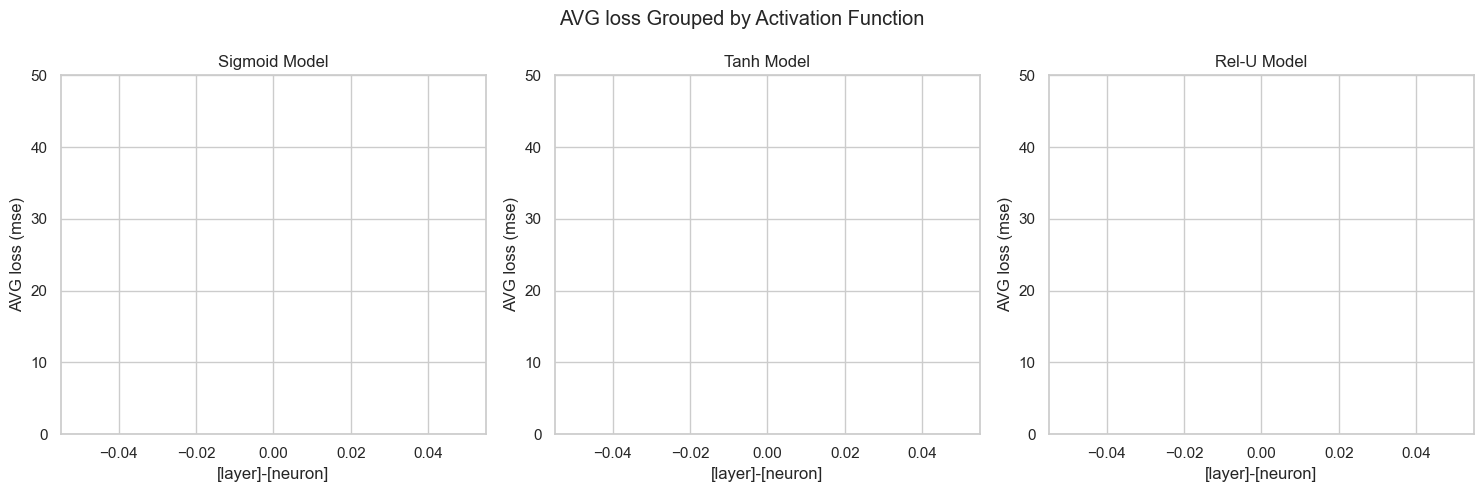

In [225]:
# Membandingkan setiap hasil dari 3 model
fig, axes = plt.subplots(1, 3, figsize=(15,5))

x = ['-'.join(m[0].split('_')[2:]) for m in resultDf.values if m[1] == "sigmoid"]
axes[0].bar(x, [m[4] for m in resultDf.values if m[1] == "sigmoid"], label="sigmoid", color='orange')
axes[0].set_ylim(0, 50)
axes[0].set_title("Sigmoid Model")
axes[0].set_xlabel("[layer]-[neuron]")
axes[0].set_ylabel("AVG loss (mse)")

x = ['-'.join(m[0].split('_')[2:]) for m in resultDf.values if m[1] == "tanh"]
axes[1].bar(x, [m[4] for m in resultDf.values if m[1] == "tanh"], label="tanh", color='blue')
axes[1].set_ylim(0, 50)
axes[1].set_title("Tanh Model")
axes[1].set_xlabel("[layer]-[neuron]")
axes[1].set_ylabel("AVG loss (mse)")


x = ['-'.join(m[0].split('_')[2:]) for m in resultDf.values if m[1] == "relu"]
axes[2].bar(x, [m[4] for m in resultDf.values if m[1] == "relu"], label="relu", color='green')
axes[2].set_ylim(0, 50)
axes[2].set_title("Rel-U Model")
axes[2].set_xlabel("[layer]-[neuron]")
axes[2].set_ylabel("AVG loss (mse)")

plt.suptitle("AVG loss Grouped by Activation Function")
plt.tight_layout()
plt.show()

In [226]:
lowestMSE = min([np.mean(m["loss"]) for m in models ])
bestModel = [m for m in models if np.mean(m["loss"]) == lowestMSE][0]
bestModel

ValueError: min() arg is an empty sequence

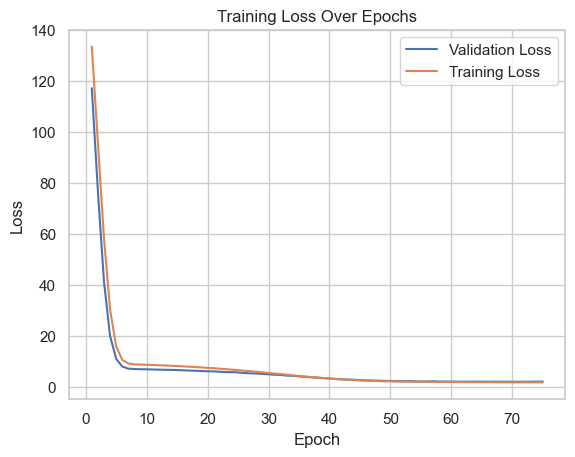

In [ ]:
history = bestModel['history']

# Extract the loss values from the training history
valLoss = history.history['val_loss']
loss = history.history['loss']

# Create a list of epoch numbers (1 to the number of epochs)
epochs = range(1, len(loss) + 1)
# Plot the loss over epochs
plt.plot(epochs, valLoss, label='Validation Loss')
plt.plot(epochs, loss, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

5/5 [==============================] - 0s 704us/step


(0.0, 18.0)

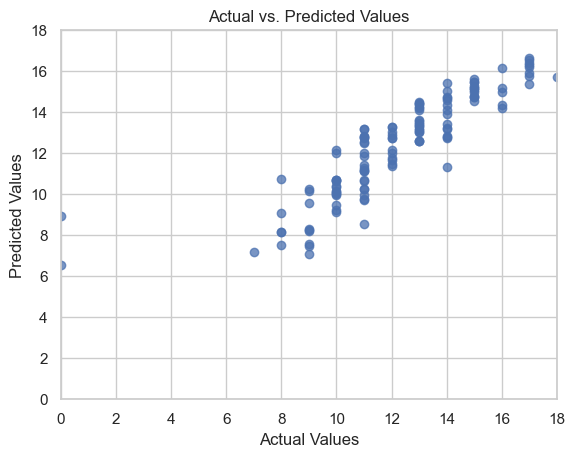

In [ ]:
yPred = bestModel['model'].predict(xTest.values)

plt.scatter(yTest.values, yPred, alpha=0.75)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.ylim(min(yTest.values), max(yTest.values))
plt.xlim(min(yTest.values), max(yTest.values))

### Training menggunakan seluruh feature

Melakukan split data

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

Function compile

In [ ]:
def trainModel(train, epoch, optimizer='Adam', loss='mean_squared_error') :
    model.compile(optimizer=optimizer, loss=loss)

    history = model.fit(train[0].values, train[1].values, epochs=epoch, validation_data=(train[2].values, train[3].values))
    return history

Baseline model

In [ ]:
model = tf.keras.models.Sequential ([
    tf.keras.layers.Dense(83, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear'),
])

history = trainModel([xTrain, yTrain, xTest, yTest], 50)


Epoch 1/50


17/17 [==============================] - 0s 4ms/step - loss: 136.9787 - val_loss: 129.0413
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 119.6916 - val_loss: 113.6116
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 106.7364 - val_loss: 102.5368
Epoch 4/50
17/17 [==============================] - 0s 1ms/step - loss: 97.6447 - val_loss: 95.2211
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 91.5388 - val_loss: 89.8089
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 86.7711 - val_loss: 85.4546
Epoch 7/50
17/17 [==============================] - 0s 1ms/step - loss: 82.8102 - val_loss: 81.5576
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 79.2043 - val_loss: 78.0247
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 75.8825 - val_loss: 74.7310
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 72.7908 - val_loss: 71.5937
Epoc

Graph actual vs predict & Training loss

5/5 [==============================] - 0s 713us/step


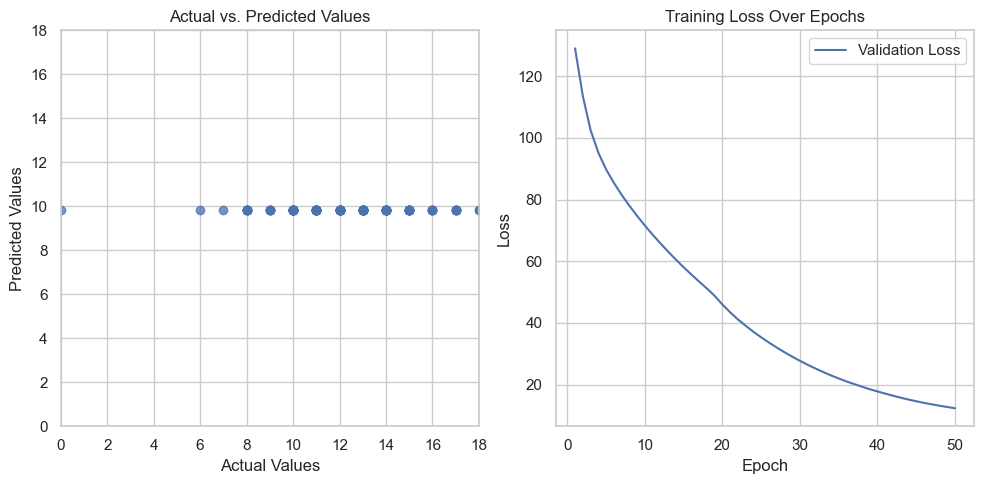

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

yPred = model.predict(xTest.values)

# Membuat scatter plot untuk membandingkan hasil aktual dan hasil prediksi
axes[0].scatter(yTest.values, yPred, alpha=0.75)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Actual vs. Predicted Values')
axes[0].set_ylim(min(yTest.values), max(yTest.values))
axes[0].set_xlim(min(yTest.values), max(yTest.values))

# Extract the loss values from the training history
loss = history.history['val_loss']

# Create a list of epoch numbers (1 to the number of epochs)
epochs = range(1, len(loss) + 1)

# Plot the loss over epochs
axes[1].plot(epochs, loss, label='Validation Loss')
axes[1].set_title('Training Loss Over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


Mencari epoch terbaik untuk base model

Epoch 1/50
17/17 [==============================] - 0s 4ms/step - loss: 150.5026 - val_loss: 149.4358
Epoch 2/50
17/17 [==============================] - 0s 1ms/step - loss: 143.7865 - val_loss: 142.7301
Epoch 3/50
17/17 [==============================] - 0s 1ms/step - loss: 137.3835 - val_loss: 136.3416
Epoch 4/50
17/17 [==============================] - 0s 1ms/step - loss: 131.2695 - val_loss: 130.0936
Epoch 5/50
17/17 [==============================] - 0s 1ms/step - loss: 125.1877 - val_loss: 123.9107
Epoch 6/50
17/17 [==============================] - 0s 1ms/step - loss: 119.1790 - val_loss: 117.6555
Epoch 7/50
17/17 [==============================] - 0s 1ms/step - loss: 113.0325 - val_loss: 111.3153
Epoch 8/50
17/17 [==============================] - 0s 1ms/step - loss: 106.8686 - val_loss: 104.9862
Epoch 9/50
17/17 [==============================] - 0s 1ms/step - loss: 100.7452 - val_loss: 98.6881
Epoch 10/50
17/17 [==============================] - 0s 1ms/step - loss: 94.7300 - 

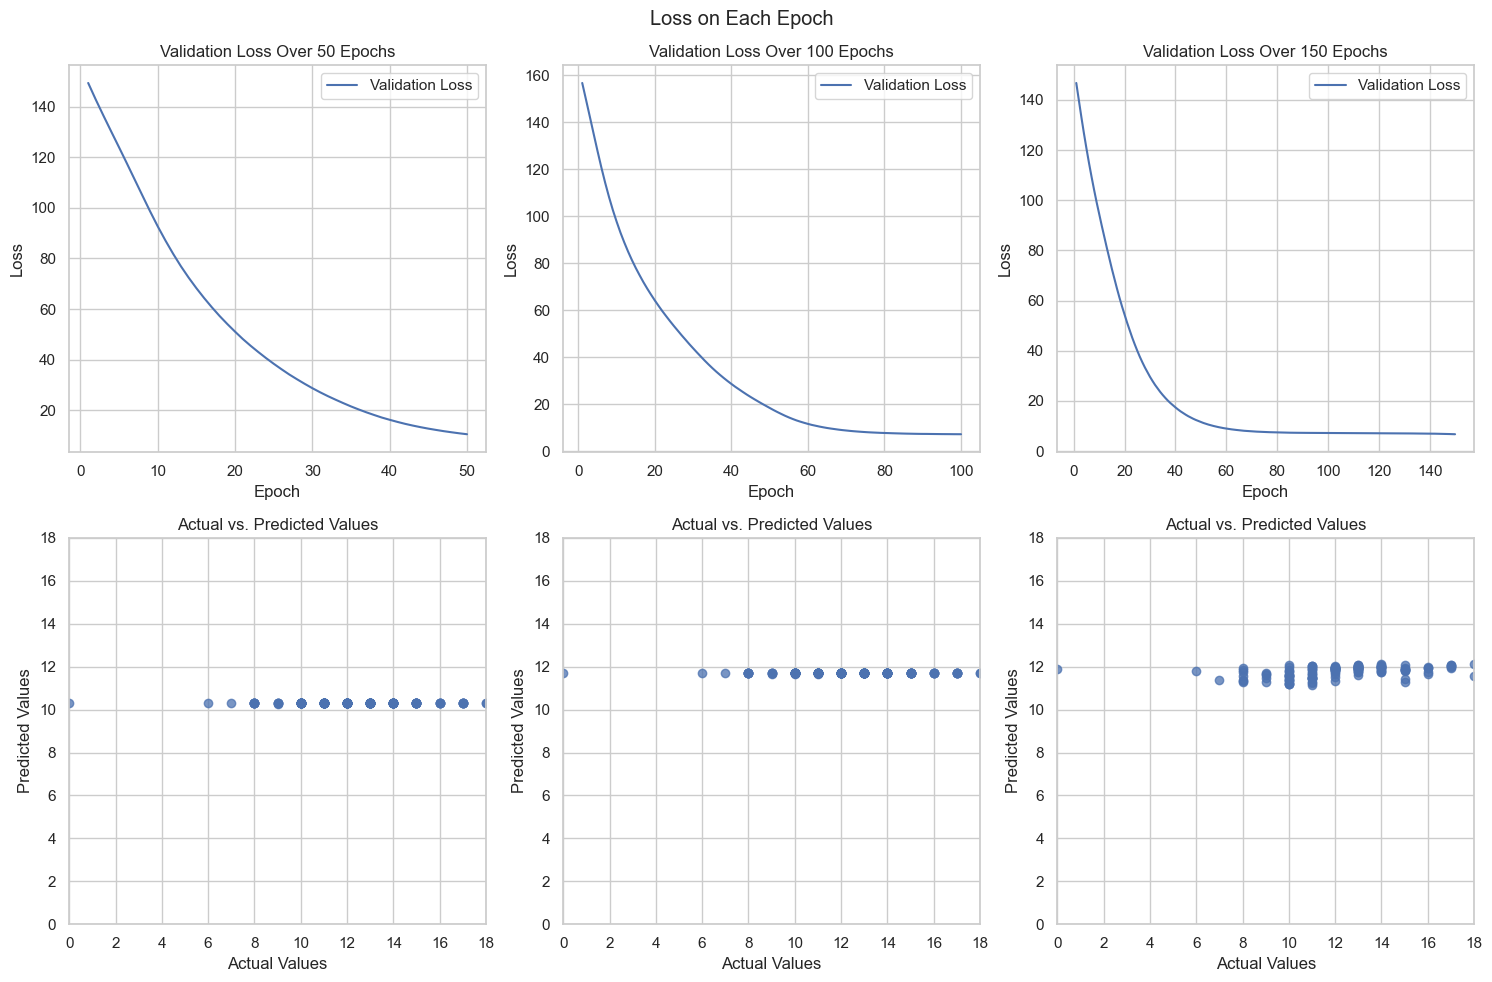

In [ ]:
#Mencari epoch
nEpochs = [50, 100, 150]

fig, axes = plt.subplots(2, len(nEpochs), figsize=(15,10))

for i, epoch in enumerate(nEpochs) :
    model = tf.keras.models.Sequential ([
        tf.keras.layers.Dense(8, activation='sigmoid'),
        tf.keras.layers.Dense(16, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='linear'),
    ])

    history = trainModel([xTrain, yTrain, xTest, yTest], epoch)

    # Extract the loss values from the training history
    loss = history.history['val_loss']

    # Create a list of epoch numbers (1 to the number of epochs)
    epochs = range(1, len(loss) + 1)

    # Plot the loss over epochs
    axes[0][i].plot(epochs, loss, label='Validation Loss')
    axes[0][i].set_title(f'Validation Loss Over {epoch} Epochs')
    axes[0][i].set_xlabel('Epoch')
    axes[0][i].set_ylabel('Loss')

    axes[0][i].legend()

    yPred = model.predict(xTest.values)

    axes[1][i].scatter(yTest.values, yPred, alpha=0.75)
    axes[1][i].set_xlabel('Actual Values')
    axes[1][i].set_ylabel('Predicted Values')
    axes[1][i].set_title('Actual vs. Predicted Values')
    axes[1][i].set_ylim(min(yTest.values), max(yTest.values))
    axes[1][i].set_xlim(min(yTest.values), max(yTest.values))

plt.suptitle('Loss on Each Epoch')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()


Melakukan model exploration terhadap 3 fungsi aktivasi berbeda, 2 layer berbeda, dan nNodes berbeda.

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
# Model Exploration (at least 3 scheme)
# Write your code here
activationFunction = ["sigmoid", "relu", "tanh"]
nLayers = [1, 2]
nNodes = [16, 32, 64]

columns_count = len(X.columns)

#Membuat 3 model
models = []
for activation in activationFunction :
    for layer in nLayers :
        for node in nNodes :

            modelData = {
                "name" : "",
                "layer" : [],
                "loss" : [],
                "lossPercent" : [],
                "model" : '',
                "history" : ''
            }
            lossArr = []

            for iTrain, iTest in kf.split(X) :
                layerData = []
                model = tf.keras.models.Sequential ([])

                model.add(tf.keras.layers.Dense(columns_count, activation=activation))
                layerData.append({
                    "num" : 0,
                    "node" : columns_count,
                    "activation" : activation
                })
                for i in range(layer) :
                    model.add(tf.keras.layers.Dense(node, activation=activation))
                    layerData.append({
                        "num" : i+1,
                        "node" : node,
                        "activation" : activation
                    })
                model.add(tf.keras.layers.Dense(1, activation='linear'))
                layerData.append({
                    "num" : layer+1,
                    "node" : 1,
                    "activation" : "linear"
                })

                xTrain = X.iloc[iTrain]
                yTrain = y.iloc[iTrain]
                xTest = X.iloc[iTest]
                yTest = y.iloc[iTest]

                history = trainModel([xTrain, yTrain, xTest, yTest], 75)

                #Val Score & MAPE
                valData = model.predict(xTest.values)

                valScore = np.mean((valData - yTest)**2)
                valPercent = np.mean((np.abs(valData-yTest))/(yTest)*100)

                modelData["loss"].append(valScore)
                modelData["lossPercent"].append(valPercent)

            modelData["name"] = f"model_{activation}_{layer}_{node}"
            modelData["layer"] = layerData
            modelData["model"] = model
            modelData["history"] = history

            models.append(modelData)

Epoch 1/75


17/17 [==============================] - 0s 4ms/step - loss: 136.0757 - val_loss: 130.4828
Epoch 2/75
17/17 [==============================] - 0s 1ms/step - loss: 122.6301 - val_loss: 117.8603
Epoch 3/75
17/17 [==============================] - 0s 1ms/step - loss: 111.1887 - val_loss: 107.2921
Epoch 4/75
17/17 [==============================] - 0s 1ms/step - loss: 101.7251 - val_loss: 98.5926
Epoch 5/75
17/17 [==============================] - 0s 1ms/step - loss: 94.1080 - val_loss: 91.5898
Epoch 6/75
17/17 [==============================] - 0s 1ms/step - loss: 87.8416 - val_loss: 85.7517
Epoch 7/75
17/17 [==============================] - 0s 1ms/step - loss: 82.5405 - val_loss: 80.7075
Epoch 8/75
17/17 [==============================] - 0s 1ms/step - loss: 77.9638 - val_loss: 76.2767
Epoch 9/75
17/17 [==============================] - 0s 1ms/step - loss: 73.9162 - val_loss: 72.3345
Epoch 10/75
17/17 [==============================] - 0s 1ms/step - loss: 70.2746 - val_loss: 68.7052
Epo

In [ ]:
# Membuat DataFrame 'resultDf' dari data yang dihasilkan
resultDf = pd.DataFrame({
    "model_name" : [m["name"] for m in models],
    "activation_func" : [m["name"].split('_')[1] for m in models],
    "layer_1" : [m["layer"][1]["node"] for m in models],
    "layer_2" : [m["layer"][2]["node"] if len(m["layer"])>3 else "-" for m in models],
    "avg_loss" : [round(np.mean(m["loss"]), 2) for m in models],
    "avg_loss (percent)" : [round(np.mean(m["lossPercent"]), 3) for m in models],
    "delta_loss" : [round(max(m["loss"]) - min(m["loss"]), 2) for m in models]
})

resultDf.sort_values(by='avg_loss')

,model_name,activation_func,layer_1,layer_2,avg_loss,delta_loss
14,model_tanh_1_64,tanh,64,-,2.17,2.33
9,model_relu_2_16,relu,16,16,2.29,2.67
7,model_relu_1_32,relu,32,-,2.39,2.41
17,model_tanh_2_64,tanh,64,64,2.46,1.87
6,model_relu_1_16,relu,16,-,2.51,2.72
8,model_relu_1_64,relu,64,-,2.53,2.53
11,model_relu_2_64,relu,64,64,2.76,1.96
16,model_tanh_2_32,tanh,32,32,2.78,3.06
10,model_relu_2_32,relu,32,32,2.92,3.29
13,model_tanh_1_32,tanh,32,-,3.08,4.28


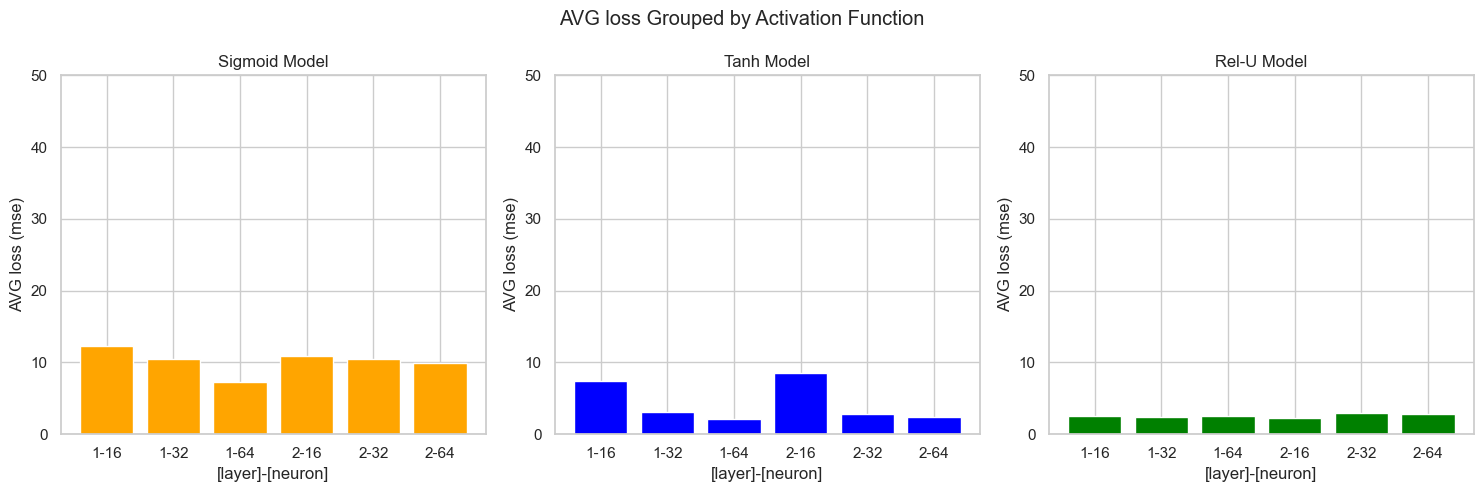

In [ ]:
# Membandingkan setiap hasil dari 3 model
fig, axes = plt.subplots(1, 3, figsize=(15,5))

x = ['-'.join(m[0].split('_')[2:]) for m in resultDf.values if m[1] == "sigmoid"]
axes[0].bar(x, [m[4] for m in resultDf.values if m[1] == "sigmoid"], label="sigmoid", color='orange')
axes[0].set_ylim(0, 50)
axes[0].set_title("Sigmoid Model")
axes[0].set_xlabel("[layer]-[neuron]")
axes[0].set_ylabel("AVG loss (mse)")

x = ['-'.join(m[0].split('_')[2:]) for m in resultDf.values if m[1] == "tanh"]
axes[1].bar(x, [m[4] for m in resultDf.values if m[1] == "tanh"], label="tanh", color='blue')
axes[1].set_ylim(0, 50)
axes[1].set_title("Tanh Model")
axes[1].set_xlabel("[layer]-[neuron]")
axes[1].set_ylabel("AVG loss (mse)")


x = ['-'.join(m[0].split('_')[2:]) for m in resultDf.values if m[1] == "relu"]
axes[2].bar(x, [m[4] for m in resultDf.values if m[1] == "relu"], label="relu", color='green')
axes[2].set_ylim(0, 50)
axes[2].set_title("Rel-U Model")
axes[2].set_xlabel("[layer]-[neuron]")
axes[2].set_ylabel("AVG loss (mse)")

plt.suptitle("AVG loss Grouped by Activation Function")
plt.tight_layout()
plt.show()

In [ ]:
lowestMSE = min([np.mean(m["loss"]) for m in models ])
bestModel = [m for m in models if np.mean(m["loss"]) == lowestMSE][0]
bestModel

{'name': 'model_tanh_1_64',
 'layer': [{'num': 0, 'node': 45, 'activation': 'tanh'},
  {'num': 1, 'node': 64, 'activation': 'tanh'},
  {'num': 2, 'node': 1, 'activation': 'linear'}],
 'loss': [1.1467455625534058,
  3.473616123199463,
  2.0647799968719482,
  1.9453985691070557,
  2.234238862991333],
 'model': <keras.src.engine.sequential.Sequential at 0x2d462ca10>,
 'history': <keras.src.callbacks.History at 0x2a17b8410>}

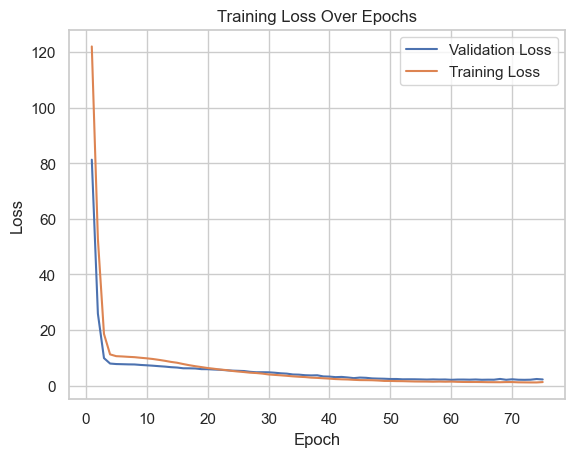

In [ ]:
history = bestModel['history']

# Extract the loss values from the training history
valLoss = history.history['val_loss']
loss = history.history['loss']

# Create a list of epoch numbers (1 to the number of epochs)
epochs = range(1, len(loss) + 1)
# Plot the loss over epochs
plt.plot(epochs, valLoss, label='Validation Loss')
plt.plot(epochs, loss, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

5/5 [==============================] - 0s 670us/step


(0.0, 18.0)

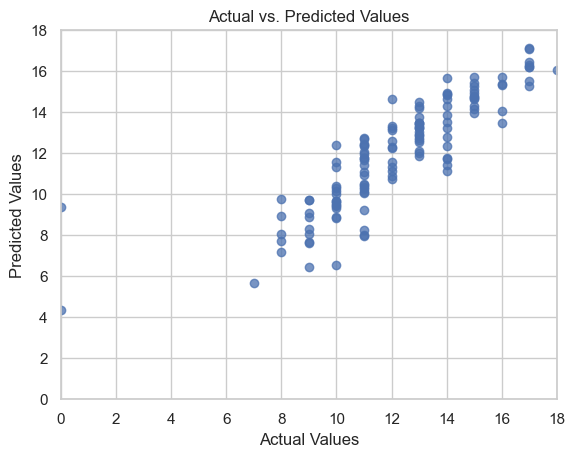

In [ ]:
yPred = bestModel['model'].predict(xTest.values)

plt.scatter(yTest.values, yPred, alpha=0.75)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.ylim(min(yTest.values), max(yTest.values))
plt.xlim(min(yTest.values), max(yTest.values))

## Hasil dan Analisis
Performa model ANN pada regresi dapat diukur dari metrik Mean Squared Error (MSE). MSE digunakan untuk mengukur sejauh mana selisih antara nilai prediksi model dan nilai aktual, dan semakin rendah nilai MSE, semakin baik kualitas modelnya. Berikut adalah rumus untuk menghitung MSE :
    
    MSE = (1 / n) * Σ(yᵢ - ŷᵢ)²

keterangan :

n   = jumlah sampel dalam dataset

yᵢ  = nilai aktual dari data atau target variabel untuk pengamatan ke-i

ŷᵢ  = nilai yang diprediksi oleh model untuk pengamatan ke-i

Untuk mendapat nilai MSE sekecil mungkin, terdapat beberapa parameter yang perlu diperhatikan seperti, nilai epoch, activation function yang digunakan, banyaknya node yang dipakai di hidden layer.

Berdasarkan model yang kami buat, kami melakukan percobaan terhadap kolom yang dipakai untuk proses training, terdapat model yang menggunakan data dengan kolom yang memiliki korelasi positif, dan model yang menggunakan data dengan semua kolom termasuk kolom yang memiliki korelasi negatif. Sehingga terdapat 2 model yang dapat dibandingkan dikarenakan setiap activation function memiliki perhitungan yang berbeda dengan begitu setiap activation function memiliki kelebihanya masing masing tergantung data yang digunakan.

![Curves-of-the-Sigmoid-Tanh-and-ReLu-activation-functions.png](https://www.researchgate.net/publication/354971308/figure/fig1/AS:1080246367457377@1634562212739/Curves-of-the-Sigmoid-Tanh-and-ReLu-activation-functions.jpg)

Untuk model yang hanya menggunakan kolom dengan korelasi positif memiliki nilai MSE sebesar 1.96. Untuk mendapatkan nilai MSE tersebut nilai epoch yang digunakan sebesar 75 dengan activation function yang digunakan adalah tanH, dan node yang digunakan sebanyak 64 node. 

Untuk model yang menggunakan semua kolom memiliki nilai MSE sebesar 2.17. Untuk mendapatkan nilai MSE tersebut nilai epoch yang digunakan sebesar 75 dengan activation function yang digunakan adalah tanH, dan node yang digunakan sebanyak 64 node.

Selain itu, untuk mengukur model ANN pada regresi dapat dilihat dari scatter plot hasil perbandingan nilai aktual dengan nilai yang diprediksi oleh model regresi. Jika pada scatter plot memiliki perbandingan dan aktual semakin lurus, maka semakin baik model itu.

Dari kedua model tersebut dapat disimpulkan bahwa model kedua model tersebut untuk menghasilkan nilai MSE minimum sama - sama menggunakan activation function tanh, yang menandakan tidak adanya perbedaan signifikan antara kolom yang dipakai hanya positif saja atau semua kolom yang dipakai. Dengan selisih nilai MSE adalah 0.21.

## Kesimpulan
Artificial Neural Network (ANN) adalah model Machine Learning yang terinspirasi dari struktur jaringan saraf manusia. Dalam ANN terdapat beberapa hyper parameter berpengaruh terhadap model antara lain, activation function, banyak epoch, dan banyak node dalam hideen layer. Kami menggunakan Mean Squared Error (MSE) untuk mengukur performa ANN. Dari percobaan yang dilakukan, model yang memiliki MSE paling rendah adalah model yang hanya menggunakan kolom yang berkorelasi positif dengan G3. Model tersebut memiliki nilai MSE sebesar 1.97, banyak epoch sebesar 75, banyaknya hidden layer adalah 1, banyaknya node dalam hidden layer adalah 64, dan menggunakan activation function tanH. Nilai MSE tesebut lebih unggul 0.21 dibanding dengan model yang menggunakan seluruh kolom, fungsi aktivasi tanH, banyaknya epoch adalah 75, banyaknya hidden layer adalah 1, dan banyaknya node dalam hidden layer adalah 64. Sehingga dapat disimpulkan bahwa loss dari kedua model tersebut berbeda hanya sedikit.